In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import IsolationForest

## Data Loader

In [319]:
df_cal = pd.read_csv('/Users/hassan/Desktop/IE/Term 3/Capstone/Dataset/DataPort_Pecanstreet/15minute_data_california/15minute_data_california.csv')
df_ny = pd.read_csv('/Users/hassan/Desktop/IE/Term 3/Capstone/Dataset/DataPort_Pecanstreet/15minute_data_newyork/15minute_data_newyork.csv')
df_aus = pd.read_csv('/Users/hassan/Desktop/IE/Term 3/Capstone/Dataset/DataPort_Pecanstreet/15minute_data_austin/15minute_data_austin.csv')


In [320]:
df_aus.head()

dataid             local_15min  air1  air2  air3  airwindowunit1  \
0     661  2018-11-21 15:15:00-06   0.0   NaN   NaN             NaN   
1     661  2018-11-21 15:30:00-06   0.0   NaN   NaN             NaN   
2     661  2018-11-21 15:45:00-06   0.0   NaN   NaN             NaN   
3     661  2018-11-21 16:00:00-06   0.0   NaN   NaN             NaN   
4     661  2018-11-21 16:15:00-06   0.0   NaN   NaN             NaN   

   aquarium1  bathroom1  bathroom2  bedroom1  ...  sprinkler1  sumppump1  \
0        NaN        NaN        NaN       NaN  ...         NaN        NaN   
1        NaN        NaN        NaN       NaN  ...         NaN        NaN   
2        NaN        NaN        NaN       NaN  ...         NaN        NaN   
3        NaN        NaN        NaN       NaN  ...         NaN        NaN   
4        NaN        NaN        NaN       NaN  ...         NaN        NaN   

   utilityroom1  venthood1  waterheater1  waterheater2  wellpump1  \
0           NaN        NaN           NaN           NaN        NaN   
1           NaN        NaN           NaN           NaN        NaN   
2           NaN        NaN           NaN           NaN        NaN   
3           NaN        NaN           NaN           NaN        NaN   
4           NaN        NaN           NaN           NaN        NaN   

   winecooler1    leg1v    leg2v  
0          NaN  123.915  124.277  
1          NaN  123.959  124.293  
2          NaN  123.886  124.240  
3          NaN  123.880  124.175  
4          NaN  123.633  124.226  

[5 rows x 79 columns]

## Austin Analysis

In [321]:
# make a copy of the data
df = df_aus.copy()

# Rename the 'local_15min' column to 'date' for consistency
df.rename(columns={'local_15min': 'date'}, inplace=True)

# Converting the 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)


# Drop rows where datetime could not be parsed
df = df.dropna(subset=['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

df_resample = df.resample('h').mean() #h

#df_resample = df.copy()


# Calculate the threshold for dropping columns (80% of the data must be non-null)
#column_thresh = int(df_resample.shape[0] * 0.8)

# Drop columns with more than 20% null values
#df_resample = df_resample.dropna(axis=1, thresh=column_thresh)

df_resample['date'] = df_resample.index

df_resample['date'] = pd.to_datetime(df_resample['date'])

display(df_resample.head())

display(df_resample.shape)


dataid      air1     air2  air3  airwindowunit1  \
date                                                                           
2018-01-01 06:00:00+00:00  5714.125  0.164842  0.01675   NaN           0.024   
2018-01-01 07:00:00+00:00  5714.125  0.146644  0.00650   NaN           0.024   
2018-01-01 08:00:00+00:00  5851.960  0.082467  0.00775   NaN           0.024   
2018-01-01 09:00:00+00:00  5851.960  0.083034  0.00725   NaN           0.024   
2018-01-01 10:00:00+00:00  5851.960  0.087875  0.00500   NaN           0.024   

                           aquarium1  bathroom1  bathroom2  bedroom1  \
date                                                                   
2018-01-01 06:00:00+00:00        NaN   0.007643    0.42350  0.152167   
2018-01-01 07:00:00+00:00        NaN   0.008875        NaN  0.030281   
2018-01-01 08:00:00+00:00        NaN   0.006444    0.05950  0.109400   
2018-01-01 09:00:00+00:00        NaN   0.006278    0.05925  0.099975   
2018-01-01 10:00:00+00:00        NaN   0.006194    0.05900  0.098450   

                           bedroom2  ...  sumppump1  utilityroom1  venthood1  \
date                                 ...                                       
2018-01-01 06:00:00+00:00       NaN  ...        NaN           NaN   0.009917   
2018-01-01 07:00:00+00:00  0.044375  ...        NaN           NaN   0.005417   
2018-01-01 08:00:00+00:00  0.081000  ...        NaN           NaN   0.005542   
2018-01-01 09:00:00+00:00  0.081125  ...        NaN           NaN   0.005750   
2018-01-01 10:00:00+00:00  0.071313  ...        NaN           NaN   0.005625   

                           waterheater1  waterheater2  wellpump1  winecooler1  \
date                                                                            
2018-01-01 06:00:00+00:00      0.003750       0.01525        NaN      0.03750   
2018-01-01 07:00:00+00:00      0.479000           NaN        NaN          NaN   
2018-01-01 08:00:00+00:00      0.001750       0.00650        NaN      0.03850   
2018-01-01 09:00:00+00:00      0.002000       0.00525        NaN      0.03775   
2018-01-01 10:00:00+00:00      0.002125       0.00500        NaN      0.03800   

                                leg1v       leg2v                      date  
date                                                                         
2018-01-01 06:00:00+00:00         NaN         NaN 2018-01-01 06:00:00+00:00  
2018-01-01 07:00:00+00:00  120.621842  120.740263 2018-01-01 07:00:00+00:00  
2018-01-01 08:00:00+00:00  122.490188  122.663750 2018-01-01 08:00:00+00:00  
2018-01-01 09:00:00+00:00  122.387793  122.568902 2018-01-01 09:00:00+00:00  
2018-01-01 10:00:00+00:00  122.120467  122.282772 2018-01-01 10:00:00+00:00  

[5 rows x 79 columns]

(8760, 79)

### Merge similar items/rooms

### Merge numbered items

In [322]:
display((df_resample.columns))

display(df_resample.shape)

Index(['dataid', 'air1', 'air2', 'air3', 'airwindowunit1', 'aquarium1',
       'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2', 'bedroom3',
       'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2', 'circpump1',
       'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1', 'diningroom2',
       'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1', 'furnace1',
       'furnace2', 'garage1', 'garage2', 'grid', 'heater1', 'heater2',
       'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1', 'kitchen2',
       'kitchenapp1', 'kitchenapp2', 'lights_plugs1', 'lights_plugs2',
       'lights_plugs3', 'lights_plugs4', 'lights_plugs5', 'lights_plugs6',
       'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1', 'sumppump1',

(8760, 79)

In [323]:
# Dictionary to store grouped columns by their prefix
grouped_columns = {}

# Loop through each column name
for col in df_resample.columns:
    # Check if the column ends with a number
    match = re.match(r"(.+?)(\d+)$", col)  # captures the prefix and trailing number
    
    if match:
        # Extract the prefix (everything before the last number)
        prefix = match.group(1)
        
        # Add column to the dictionary under its prefix
        if prefix not in grouped_columns:
            grouped_columns[prefix] = []
        grouped_columns[prefix].append(col)

# Now, merge columns by prefix
for prefix, columns in grouped_columns.items():
    # Sum the columns with the same prefix and name it the prefix itself
    df_resample[prefix] = df_resample[columns].sum(axis=1)
    
    # Drop the original columns after merging
    df_resample.drop(columns=columns, inplace=True)



### Merge items under the same category

In [324]:
def merge_columns(df, columns_to_merge, new_column_name):
    """
    Merges multiple columns into a new column by summing their values, 
    and deletes the original columns.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the columns.
    - columns_to_merge (list): List of column names to merge.
    - new_column_name (str): Name of the new column.
    
    Returns:
    - pd.DataFrame: DataFrame with merged column and original columns removed.
    """
    # Check if all specified columns exist in the DataFrame
    missing_cols = [col for col in columns_to_merge if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns not found in DataFrame: {missing_cols}")
    
    # Create the new column by summing the specified columns row-wise
    df[new_column_name] = df[columns_to_merge].sum(axis=1)
    
    # Drop the original columns
    df.drop(columns=columns_to_merge, inplace=True)
    
    return df

In [325]:
# Fridge 
df_resample = merge_columns(df_resample, ['refrigerator', 'freezer', 'winecooler'], 'fridge')

# leg
df_resample = merge_columns(df_resample, ['leg1v', 'leg2v'], 'leg')

# Oven
df_resample = merge_columns(df_resample, ['oven', 'range'], 'oven')

# air
df_resample = merge_columns(df_resample, ['air', 'airwindowunit','furnace'], 'air')

# pool
df_resample = merge_columns(df_resample, ['pool', 'poollight', 'poolpump'], 'pool')

# pump
df_resample = merge_columns(df_resample, ['pump', 'sumppump','sewerpump','wellpump'], 'pump')

# kitchen
df_resample = merge_columns(df_resample, ['kitchen', 'icemaker','kitchenapp','dishwasher'], 'kitchen')


In [326]:
display((df_resample.columns))

display(df_resample.shape)

Index(['dataid', 'grid', 'solar', 'date', 'aquarium', 'bathroom', 'bedroom',
       'battery', 'car', 'circpump', 'clotheswasher', 'clotheswasher_dryg',
       'diningroom', 'disposal', 'drye', 'dryg', 'garage', 'heater',
       'housefan', 'jacuzzi', 'lights_plugs', 'livingroom', 'microwave',
       'office', 'outsidelights_plugs', 'security', 'shed', 'sprinkler',
       'utilityroom', 'venthood', 'waterheater', 'fridge', 'leg'],
      dtype='object')

(8760, 33)

## EDA

In [327]:
df_resample.describe()

dataid         grid   solar  aquarium     bathroom      bedroom  \
count  8759.000000  8759.000000  8760.0    8760.0  8760.000000  8760.000000   
mean   5857.308980     0.861197     0.0       0.0     0.041194     0.177414   
std      54.892723     1.019159     0.0       0.0     0.058288     0.087442   
min    5714.125000    -2.417812     0.0       0.0    -0.014800     0.000000   
25%    5851.960000     0.485715     0.0       0.0     0.010625     0.119241   
50%    5851.960000     0.829080     0.0       0.0     0.030975     0.166020   
75%    5851.960000     1.324323     0.0       0.0     0.040550     0.221089   
max    6618.937500     4.016524     0.0       0.0     0.814694     0.602392   

       battery          car  circpump  clotheswasher  ...       office  \
count   8760.0  8760.000000    8760.0    8760.000000  ...  8760.000000   
mean       0.0     0.196493       0.0       0.011423  ...     0.051923   
std        0.0     0.291144       0.0       0.264825  ...     0.030626   
min        0.0    -0.000781       0.0     -17.502319  ...     0.000000   
25%        0.0     0.001625       0.0       0.004177  ...     0.029000   
50%        0.0     0.031578       0.0       0.007050  ...     0.045214   
75%        0.0     0.350376       0.0       0.012328  ...     0.063312   
max        0.0     2.606750       0.0      17.508032  ...     0.242188   

       outsidelights_plugs  security    shed    sprinkler  utilityroom  \
count          8760.000000    8760.0  8760.0  8760.000000  8760.000000   
mean              0.030990       0.0     0.0     0.002235     0.145801   
std               0.034644       0.0     0.0     0.000745     0.150703   
min              -0.000250       0.0     0.0    -0.001875    -0.056375   
25%               0.000250       0.0     0.0     0.001875     0.001750   
50%               0.001000       0.0     0.0     0.002250     0.067438   
75%               0.072000       0.0     0.0     0.002500     0.303500   
max               0.076500       0.0     0.0     0.005375     0.657500   

          venthood  waterheater       fridge          leg  
count  8760.000000  8760.000000  8760.000000  8760.000000  
mean      0.008560     0.036177     0.253155   244.374777  
std       0.006704     0.086062     1.017546     7.495150  
min       0.000000    -0.002250   -67.068853     0.000000  
25%       0.004000     0.007250     0.218046   243.855167  
50%       0.006750     0.008250     0.259178   244.713098  
75%       0.011107     0.009531     0.292029   245.440272  
max       0.065750     1.050500    67.423538   250.104780  

[8 rows x 32 columns]

### Data Types

In [328]:
df_resample.dtypes.value_counts()

float64                32
datetime64[ns, UTC]     1
Name: count, dtype: int64

### Feature Enginering

In [329]:
df_resample['day'] = df_resample['date'].dt.date

# Extract the day as its name from the 'datetime' column and create a new 'day' column
df_resample['month'] = df_resample['date'].dt.month_name()

# Define the order of the months explicitly
month_order = ['January','February','March','April','May','June','July', 'August', 'September', 'October', 'November', 'December'] #'January', 'February', 'March', 'April', 'May', 'June',

# Convert 'month_name' to a categorical type with a defined order
df_resample['month'] = pd.Categorical(df_resample['month'], categories=month_order, ordered=True)

# Extract the day as its name from the 'datetime' column and create a new 'day' column
df_resample['day_name'] = df_resample['date'].dt.day_name()

# Define the order of the days explicitly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day' column to categorical type with a defined order
df_resample['day_name'] = pd.Categorical(df_resample['day_name'], categories=days_order, ordered=True)

# Extract the hour from the 'datetime' column and create a new 'hour' column
df_resample['hour'] = df_resample['date'].dt.hour

# Extract the hour from the 'datetime' column and create a new 'minute' column
df_resample['minute'] = df_resample['date'].dt.minute

# Define time intervals for Morning, Afternoon, Evening, Night
time_intervals = [0, 6, 12, 18, 24]
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column 'time_of_day'
df_resample['time_of_day'] = pd.cut(df_resample['hour'], bins=time_intervals, labels=time_labels, include_lowest=True, right=False)

# Create 'is_weekend' directly as a categorical feature based on the day
df_resample['is_weekend'] = pd.Categorical(df_resample['day_name'].isin(['Saturday', 'Sunday']), categories=[False, True])


## Weather Data

In [330]:
df_weather = pd.read_csv('/Users/hassan/Desktop/IE/Term 3/Capstone/Dataset/DataPort_Pecanstreet/15minute_data_austin/austin_temp_hr.csv')

# Convert 'Time' column to datetime for easier merging later
df_weather['time'] = pd.to_datetime(df_weather['time'])

df_weather['day'] = df_weather['time'].dt.date  # Extract day
df_weather['hour'] = df_weather['time'].dt.hour  # Extract hour


display(df_weather.head())

# Merge both dataframes on the 'Date' and 'Time' columns
df_resample = pd.merge(df_resample, df_weather[['day','hour','temp','dwpt','rhum','wdir','wspd','pres']], left_on=['day', 'hour'], right_on=['day', 'hour'], how='left')

# Drop the redundant 'Time' column after merging if 'Date' and 'Time' are essentially the same
#df_resample = df_resample.drop(columns=['time'])

# Display the merged dataframe
df_resample.head()

time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0 2018-01-01 00:00:00  -1.0  -3.0  86.0   NaN   NaN  360.0  13.0   NaN   
1 2018-01-01 01:00:00  -1.1  -3.3  85.0   0.0   NaN  340.0  16.6   NaN   
2 2018-01-01 02:00:00  -1.1  -3.9  81.0   0.0   NaN  350.0  14.8   NaN   
3 2018-01-01 03:00:00  -1.7  -3.9  85.0   0.0   NaN   10.0  14.8   NaN   
4 2018-01-01 04:00:00  -2.2  -5.0  81.0   0.0   NaN  360.0  20.5   NaN   

     pres  tsun  coco         day  hour  
0  1033.2   NaN  10.0  2018-01-01     0  
1  1034.4   NaN   NaN  2018-01-01     1  
2  1035.4   NaN   NaN  2018-01-01     2  
3  1036.4   NaN   NaN  2018-01-01     3  
4  1037.2   NaN  14.0  2018-01-01     4

dataid      grid  solar                      date  aquarium  bathroom  \
0  5714.125  1.529774    0.0 2018-01-01 06:00:00+00:00       0.0  0.431143   
1  5714.125  1.784683    0.0 2018-01-01 07:00:00+00:00       0.0  0.008875   
2  5851.960  1.463260    0.0 2018-01-01 08:00:00+00:00       0.0  0.065944   
3  5851.960  1.449272    0.0 2018-01-01 09:00:00+00:00       0.0  0.065528   
4  5851.960  1.443978    0.0 2018-01-01 10:00:00+00:00       0.0  0.065194   

    bedroom  battery       car  circpump  ...  hour  minute  time_of_day  \
0  0.152167      0.0  0.010036       0.0  ...     6       0      Morning   
1  0.074656      0.0  0.008214       0.0  ...     7       0      Morning   
2  0.205900      0.0  0.000125       0.0  ...     8       0      Morning   
3  0.197100      0.0 -0.000031       0.0  ...     9       0      Morning   
4  0.185762      0.0  0.000156       0.0  ...    10       0      Morning   

   is_weekend  temp  dwpt  rhum   wdir  wspd    pres  
0       False  -2.8  -6.1  78.0  360.0   9.4  1038.4  
1       False  -3.3  -7.3  74.0   10.0  13.0  1038.3  
2       False  -3.3  -8.9  65.0  360.0  18.4  1038.7  
3       False  -3.3  -9.3  63.0  350.0  13.0  1039.5  
4       False  -3.3  -9.3  63.0  360.0  14.8  1039.9  

[5 rows x 46 columns]

### Null Values

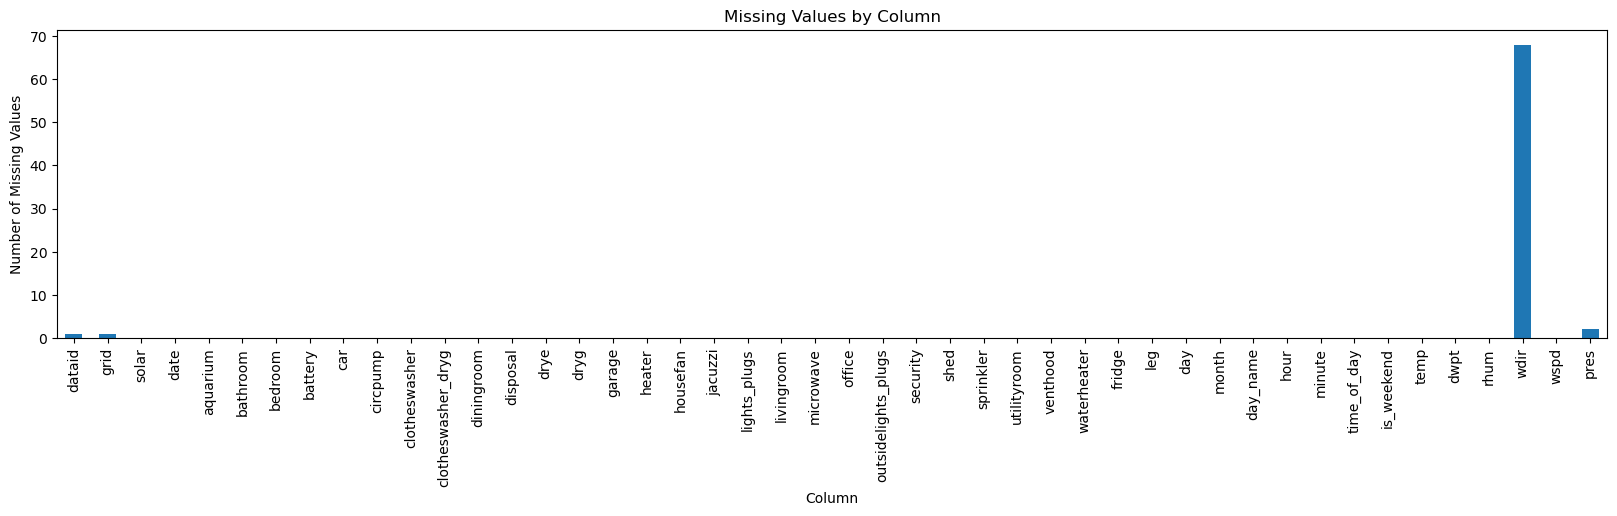

In [331]:
plt.figure(figsize=(20,4))
df_resample.isnull().sum().plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.show()

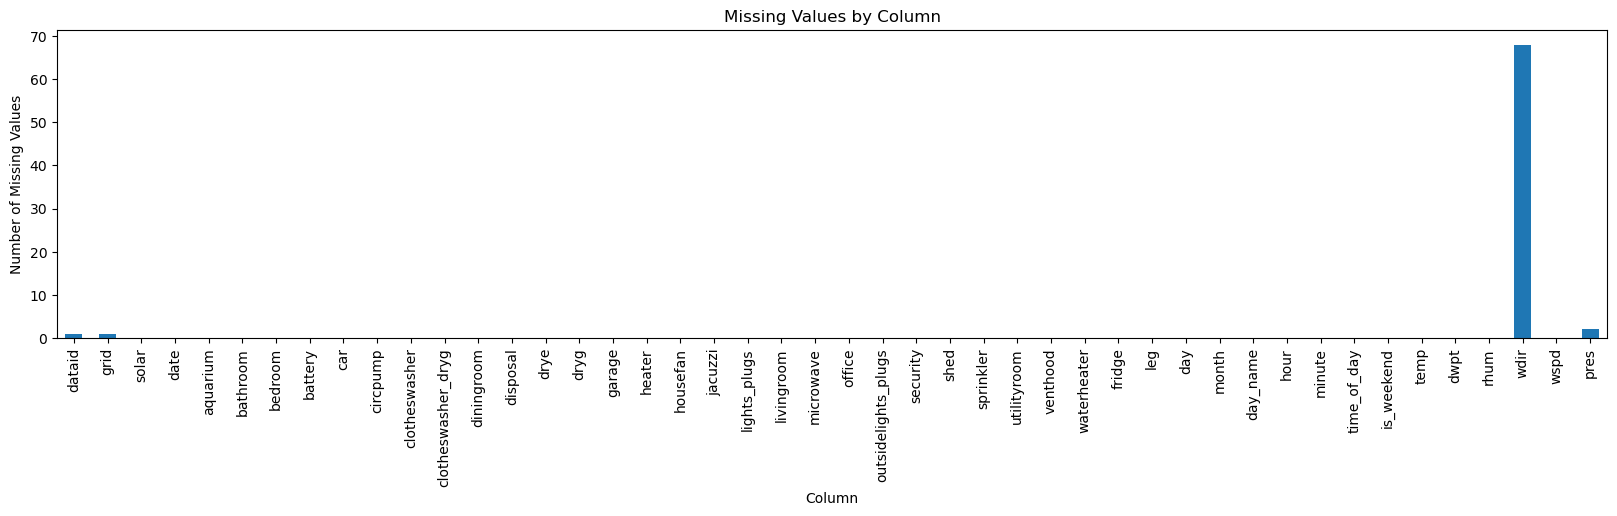

In [332]:
# Calculate threshold for null values (20% of the data length)
threshold = len(df_resample) * 0.2

# Drop columns where the number of nulls exceeds the threshold
df_cleaned = df_resample.dropna(thresh=threshold, axis=1)

plt.figure(figsize=(20,4))
df_cleaned.isnull().sum().plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.show()

Number of rows removed: 71
Percentage of data removed: 0.81 %


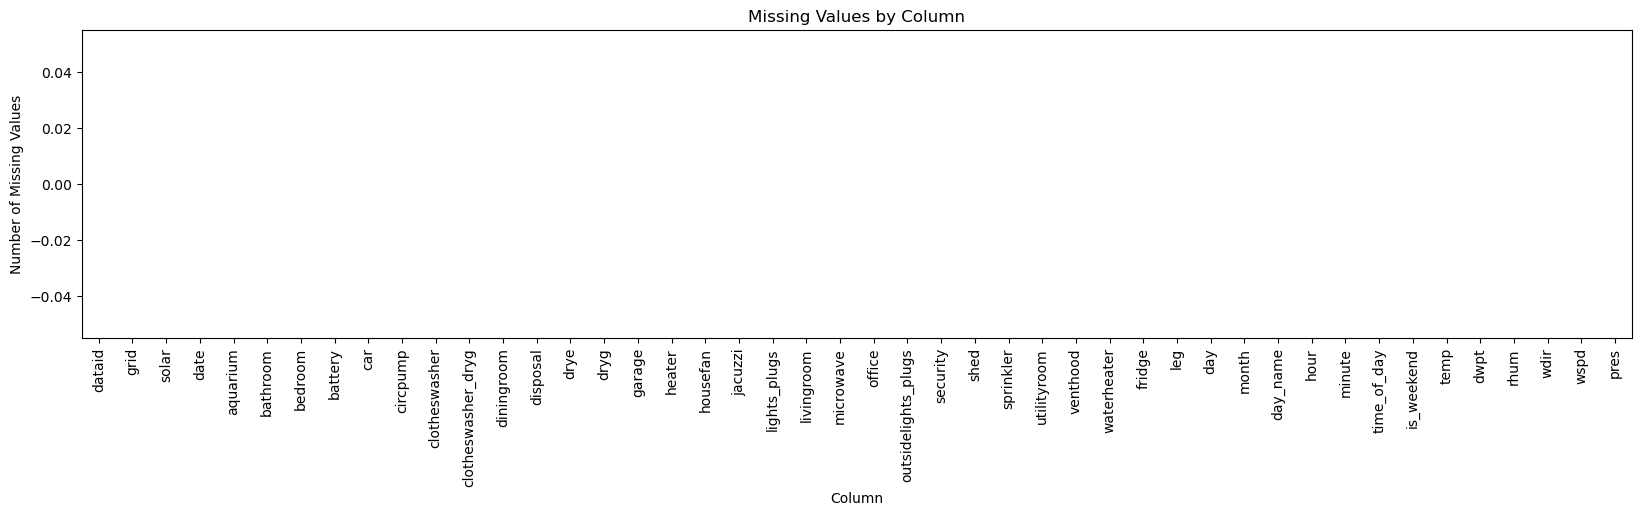

In [333]:
# Remove rows with any null values
df_cleaned = df_cleaned.dropna()

original_size = len(df_resample)
cleaned_size = len(df_cleaned)

removed_rows = original_size - cleaned_size
percentage_removed = round((removed_rows / original_size) * 100,2)

print("Number of rows removed:", removed_rows)
print("Percentage of data removed:", percentage_removed, "%")


plt.figure(figsize=(20,4))
df_cleaned.isnull().sum().plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.show()

### Data Range

In [334]:
print(f"Date Range: {df_cleaned['date'].min()} to {df_cleaned['date'].max()}")

Date Range: 2018-01-01 06:00:00+00:00 to 2019-01-01 05:00:00+00:00


### Removing data with little values

In [335]:
# Create a summary table showing the number of unique values in each column
unique_counts = df_cleaned.nunique().reset_index()
unique_counts.columns = ['Column', 'UniqueValues']

# Remove columns with few unique values (e.g., columns with 2 or fewer unique values)
low_variation_cols = unique_counts[unique_counts['UniqueValues'] <= 2]['Column'].tolist()
df_cleaned.drop(columns=low_variation_cols, inplace=True)

df_cleaned.columns


Index(['dataid', 'grid', 'date', 'bathroom', 'bedroom', 'car', 'clotheswasher',
       'diningroom', 'disposal', 'drye', 'dryg', 'garage', 'lights_plugs',
       'livingroom', 'microwave', 'office', 'outsidelights_plugs', 'sprinkler',
       'utilityroom', 'venthood', 'waterheater', 'fridge', 'leg', 'day',
       'month', 'day_name', 'hour', 'time_of_day', 'temp', 'dwpt', 'rhum',
       'wdir', 'wspd', 'pres'],
      dtype='object')

### Data Distribution

In [336]:
# List of columns to exclude from the plot
exclude_cols = ['dataid']  # Add any other columns to exclude
num_cols = df_cleaned.select_dtypes(include=['int32','int64','float64']).columns.difference(exclude_cols).tolist()

print(len(num_cols))

28


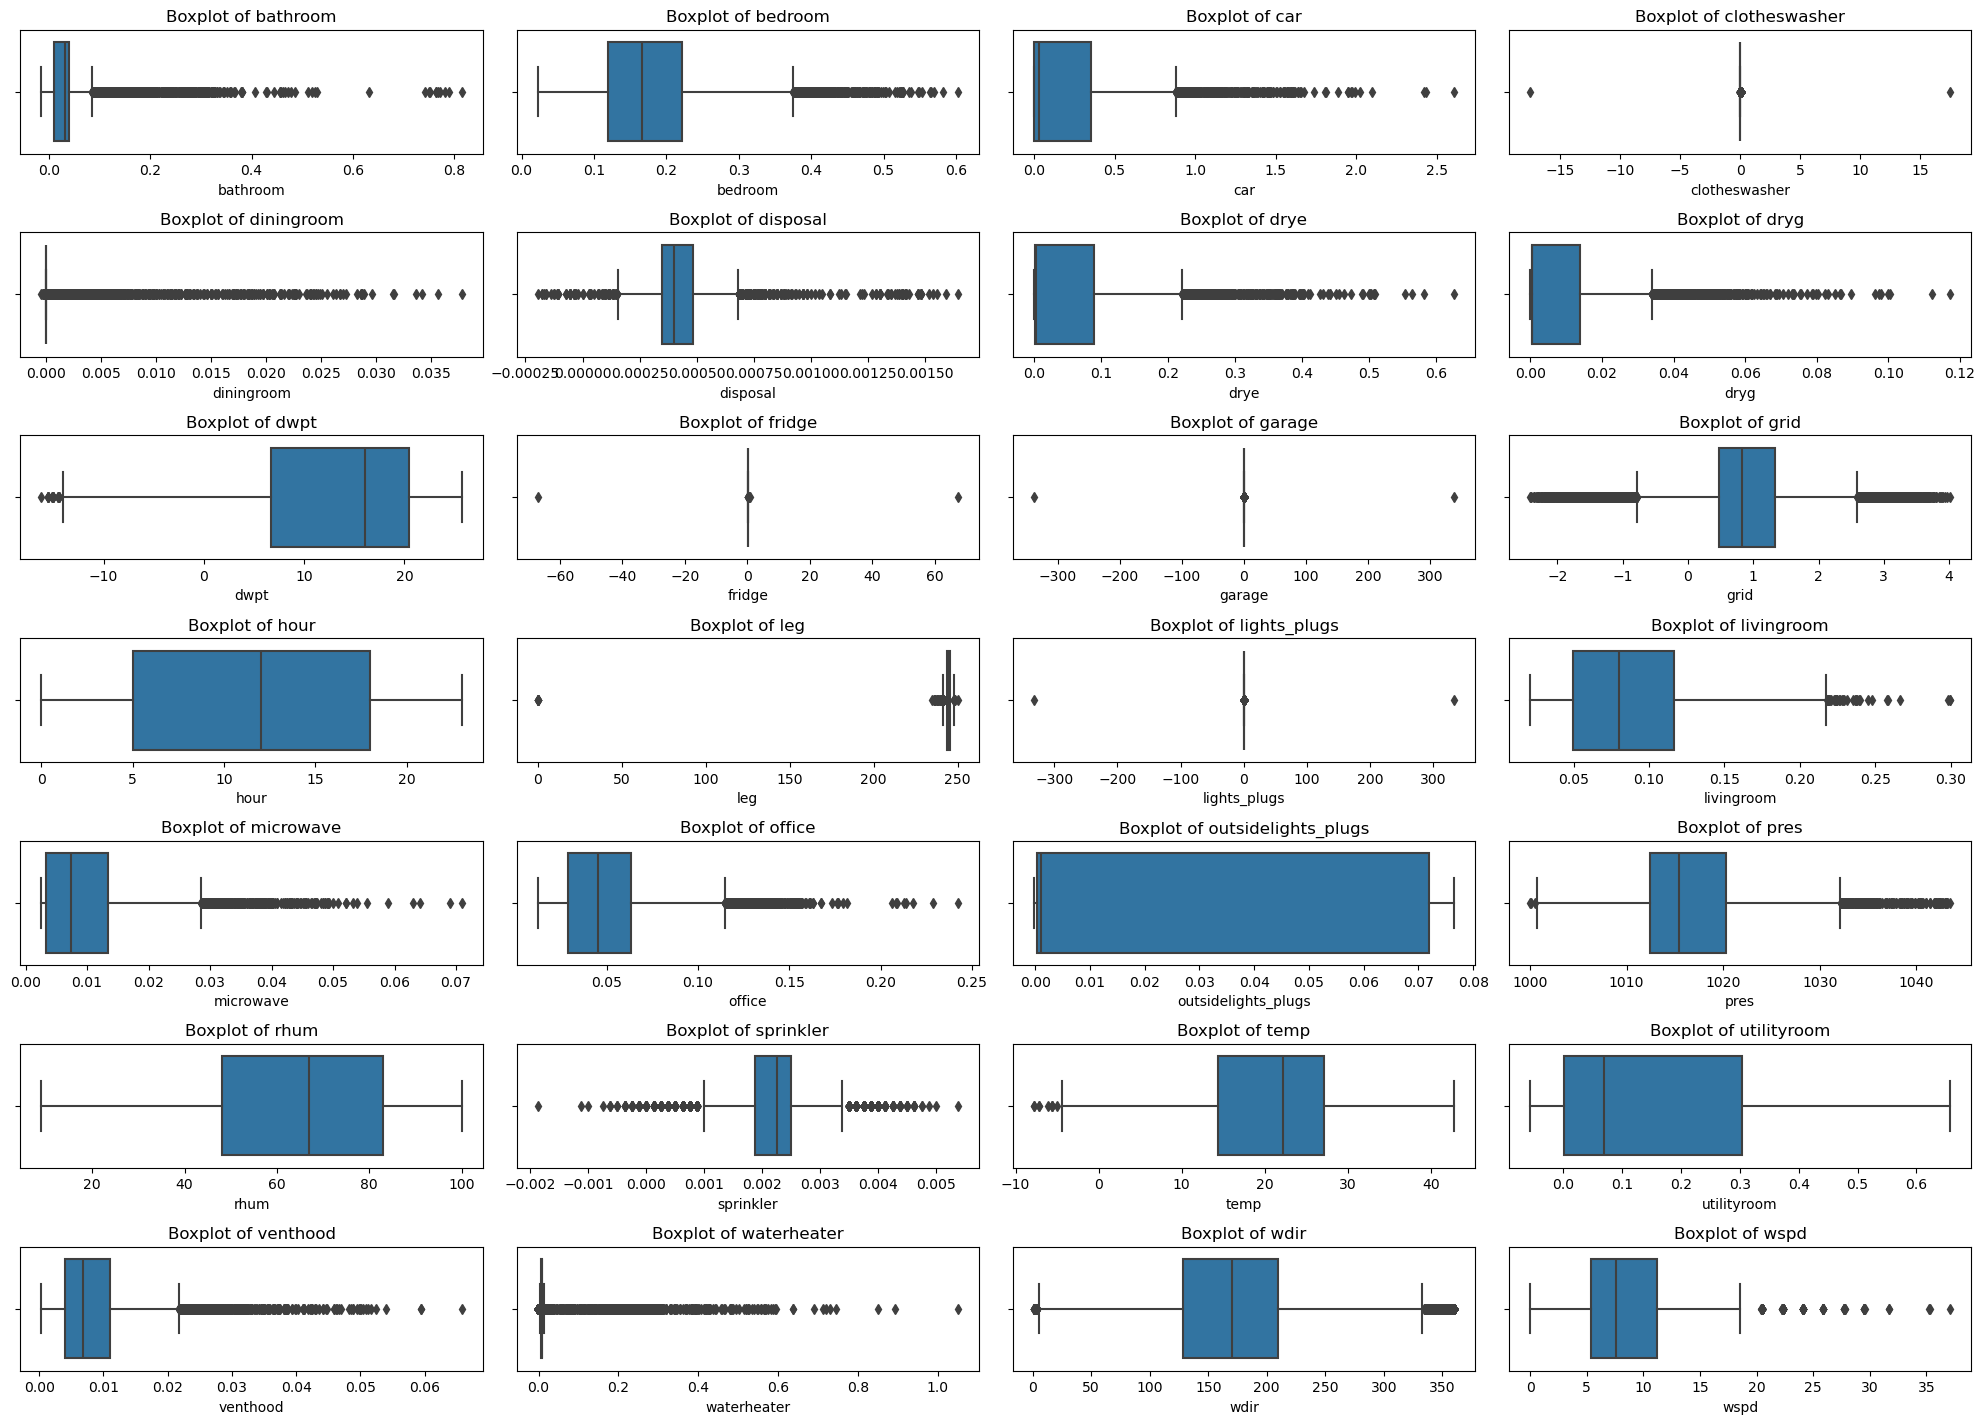

In [337]:
plt.figure(figsize=(20, 20))

# Loop through each numerical column and create a box plot in a subplot
for i, column in enumerate(num_cols):
    if column in df_cleaned.columns:
        plt.subplot(10, 4, i + 1)  # Change the subplot layout based on your number of numerical columns
        sns.boxplot(x=df_cleaned[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

### Appliances with minimal consuption

In [338]:
# Set the threshold for negligible consumption
threshold = 0.01

# Calculate the non-zero average for each numerical column
non_zero_averages = df_cleaned[num_cols].apply(lambda x: x[x > 0].mean())

# Identify columns where the non-zero average is below the threshold
low_consumption_cols = non_zero_averages[non_zero_averages < threshold].index.tolist()

# Create the "others" column by summing the low consumption columns
df_cleaned['others'] = df_cleaned[low_consumption_cols].sum(axis=1)

# Drop the original low-consumption columns
df_cleaned.drop(columns=low_consumption_cols, inplace=True)

df_cleaned.columns

Index(['dataid', 'grid', 'date', 'bathroom', 'bedroom', 'car', 'clotheswasher',
       'drye', 'garage', 'lights_plugs', 'livingroom', 'office',
       'outsidelights_plugs', 'utilityroom', 'waterheater', 'fridge', 'leg',
       'day', 'month', 'day_name', 'hour', 'time_of_day', 'temp', 'dwpt',
       'rhum', 'wdir', 'wspd', 'pres', 'others'],
      dtype='object')

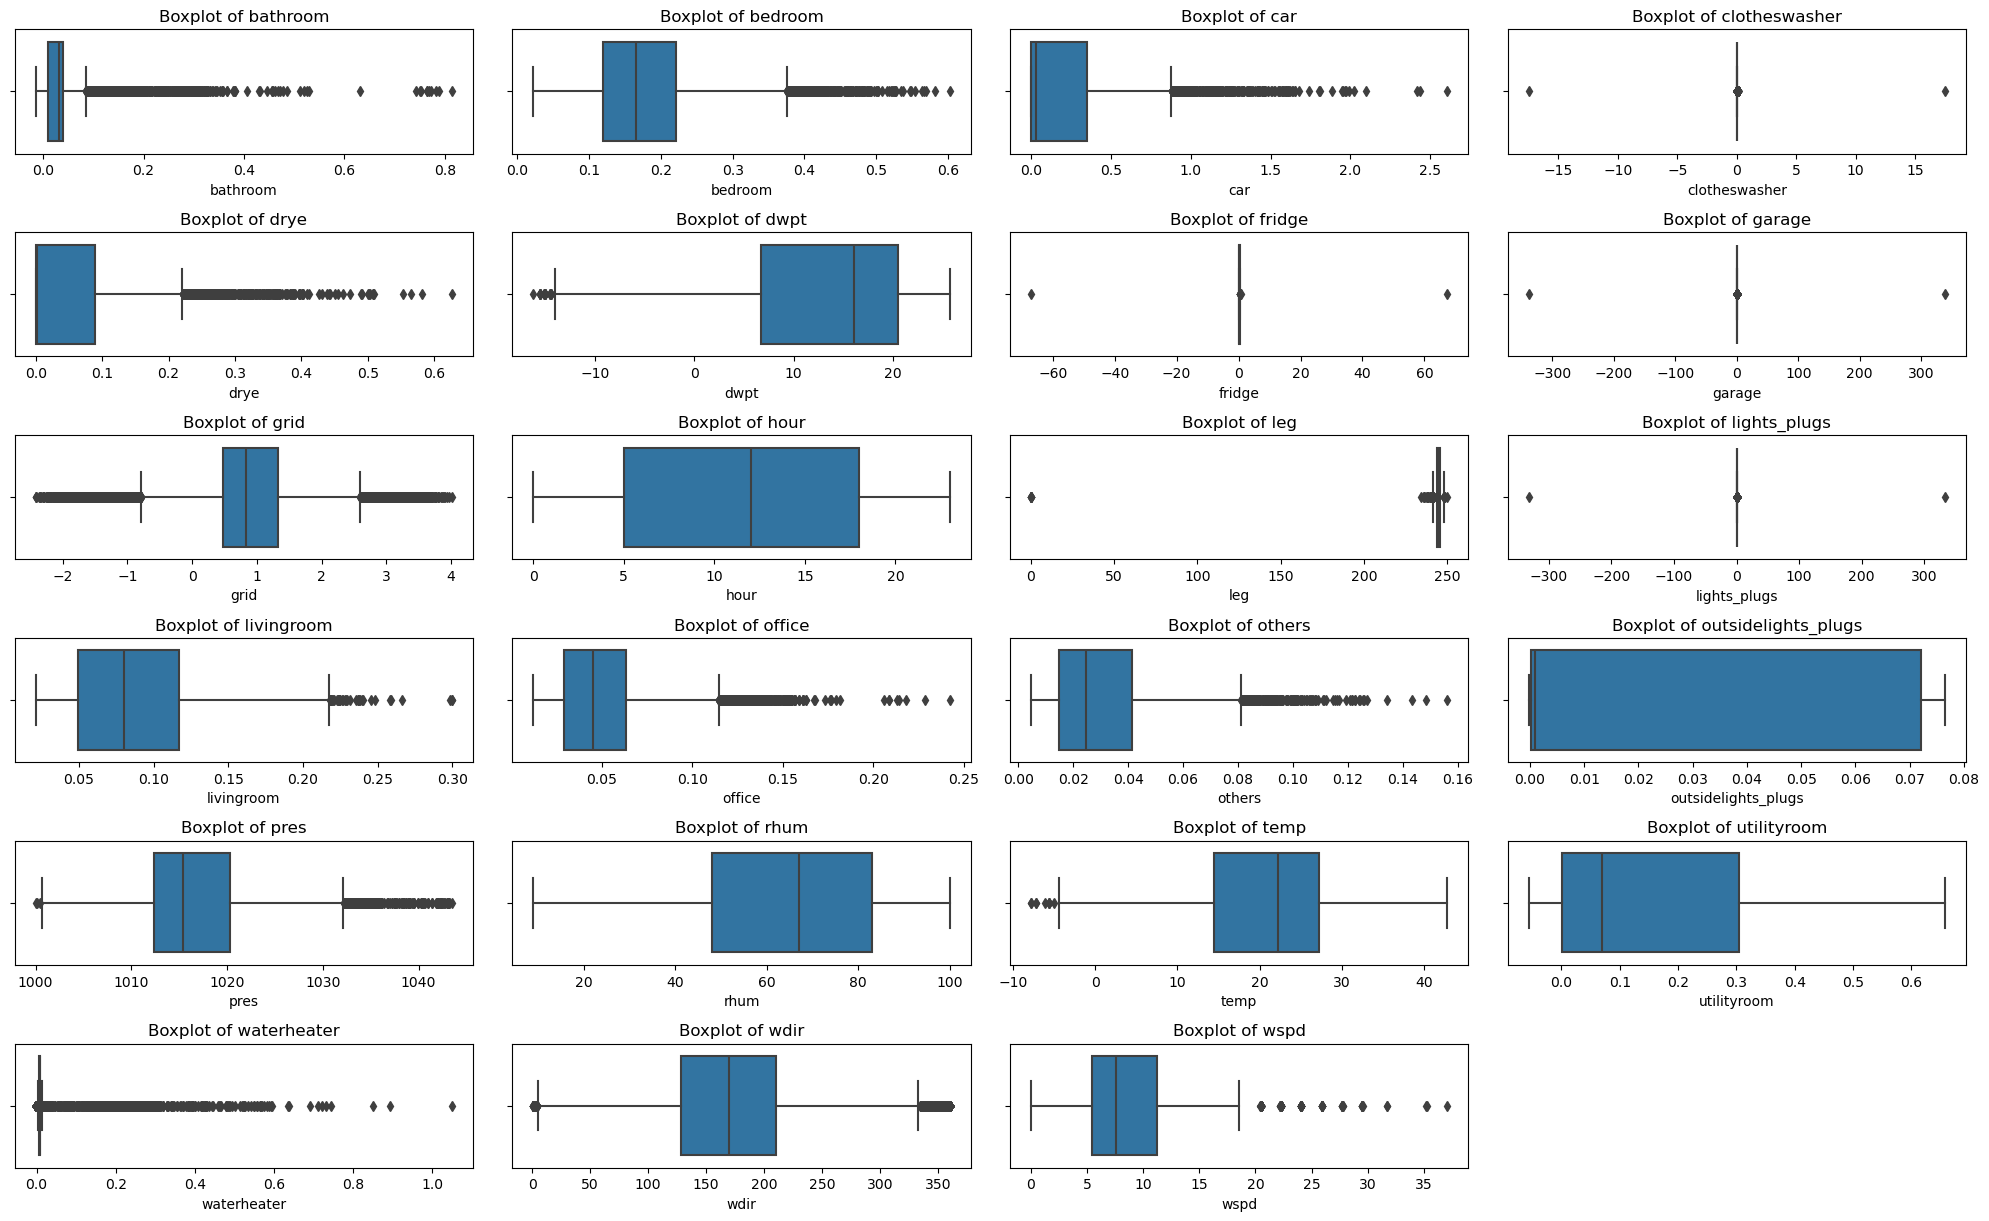

In [339]:
# List of columns to exclude from the plot
exclude_cols = ['dataid']  # Add any other columns to exclude
num_cols = df_cleaned.select_dtypes(include=['int32','int64','float64']).columns.difference(exclude_cols).tolist()


plt.figure(figsize=(20, 20))

# Loop through each numerical column and create a box plot in a subplot
for i, column in enumerate(num_cols):
    if column in df_cleaned.columns:
        plt.subplot(10, 4, i + 1)  # Change the subplot layout based on your number of numerical columns
        sns.boxplot(x=df_cleaned[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## Data Cleaning

### Negative Values

In [340]:
# List of columns to exclude from negative value removal
exclude_cols = ['grid']  # Replace with the names of columns you want to exclude

# Select columns that are not in exclude_cols
cols_to_modify = df_cleaned[num_cols].columns.difference(exclude_cols)

# Set negative values to zero in the selected columns
df_cleaned[cols_to_modify] = df_cleaned[cols_to_modify].clip(lower=0)

### Outliers

In [341]:
# Function to remove high-range outliers based on specific columns
def remove_outliers(df, columns):
    for column in columns:
        if column in df.columns:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1  # Interquartile Range

            # Define the upper bound for detecting high-range outliers (we won't remove lower bound outliers)
            upper_bound = Q3 + 1.5 * IQR

            # Filter out the rows that contain high-range outliers (above upper bound)
            df = df[df[column] <= upper_bound]
    
    return df

# List of columns to remove outliers from (replace with your specific columns)
columns_to_clean = ['clothwasher', 'fridge', 'garage','leg']  # Replace with your actual column names

# Remove outliers from the specified columns
df_cleaned = remove_outliers(df_cleaned, columns_to_clean)

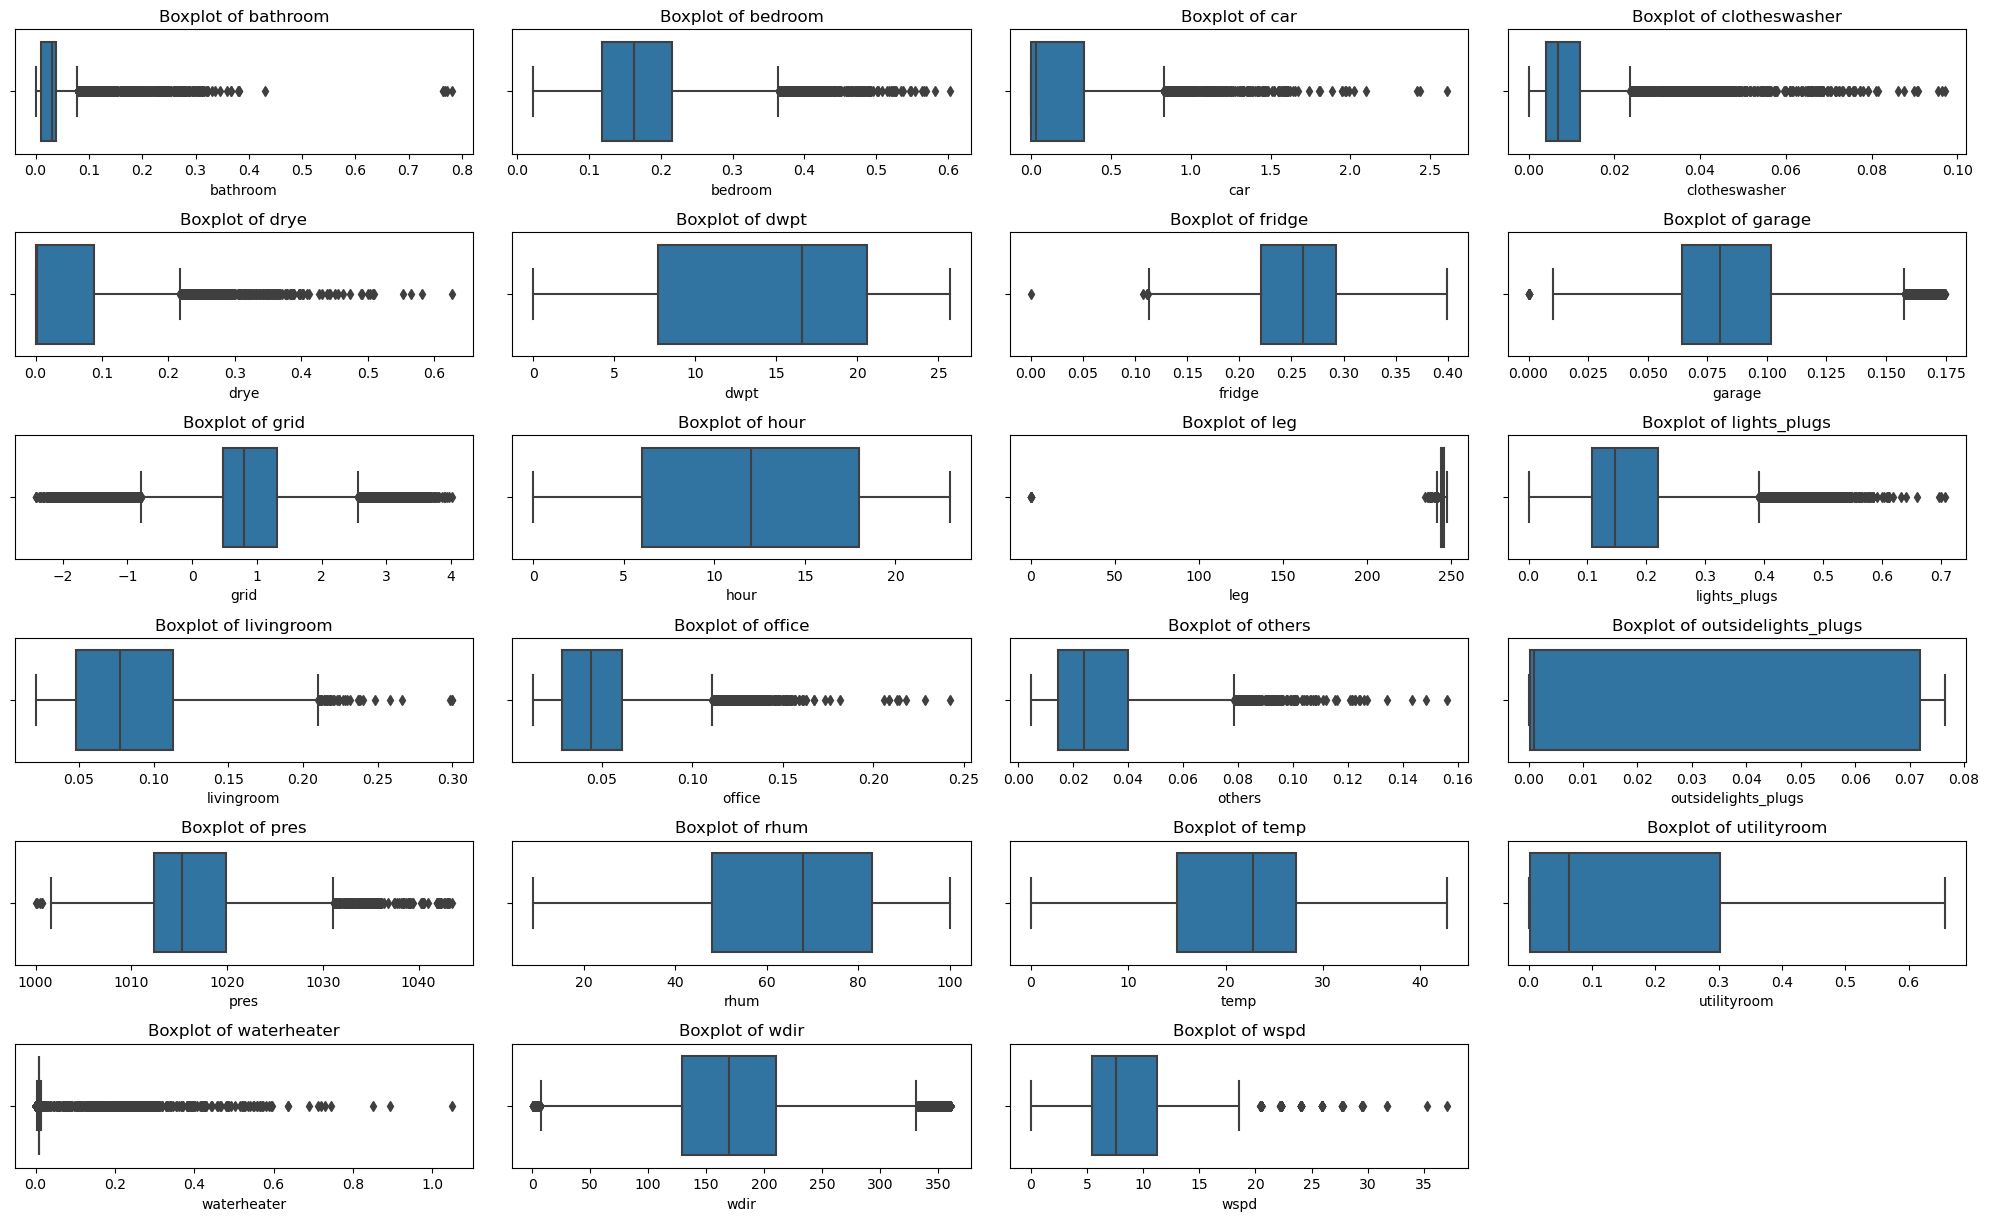

In [342]:
plt.figure(figsize=(20, 20))

# Loop through each numerical column and create a box plot in a subplot
for i, column in enumerate(num_cols):
    if column in df_cleaned.columns:
        plt.subplot(10, 4, i + 1)  # Change the subplot layout based on your number of numerical columns
        sns.boxplot(x=df_cleaned[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

### Correlation Analysis for Redundancy

In [343]:
# List of columns to exclude from the plot
exclude_cols = ['dataid']  # Add any other columns to exclude
num_cols = df_cleaned.select_dtypes(include=['int32','int64','float64']).columns.difference(exclude_cols).tolist()

cat_cols = df_cleaned.select_dtypes(include=['object','category']).columns.tolist()

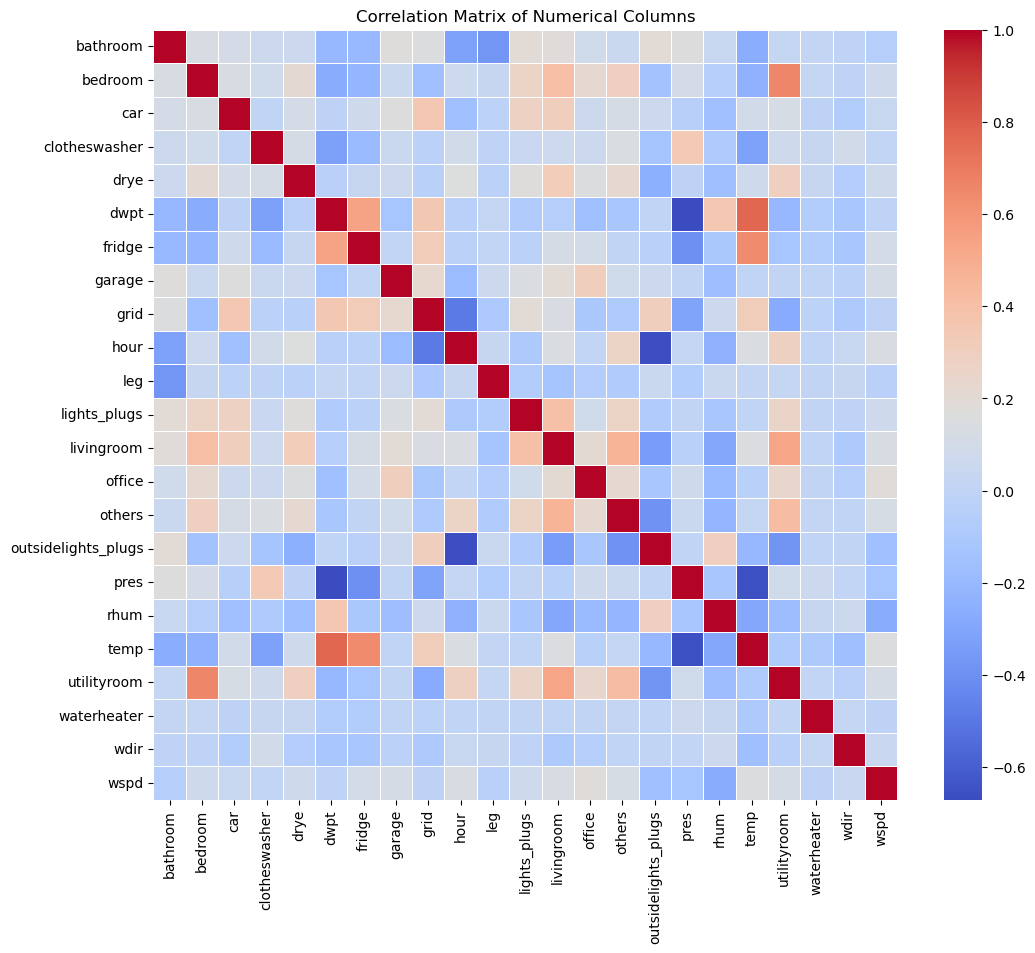

In [344]:
# Recalculate the correlation matrix for numerical columns
corr_matrix = df_cleaned[num_cols].corr()

# Plot the correlation matrix as a heatmap with simpler settings
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### Categorical Distribution

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


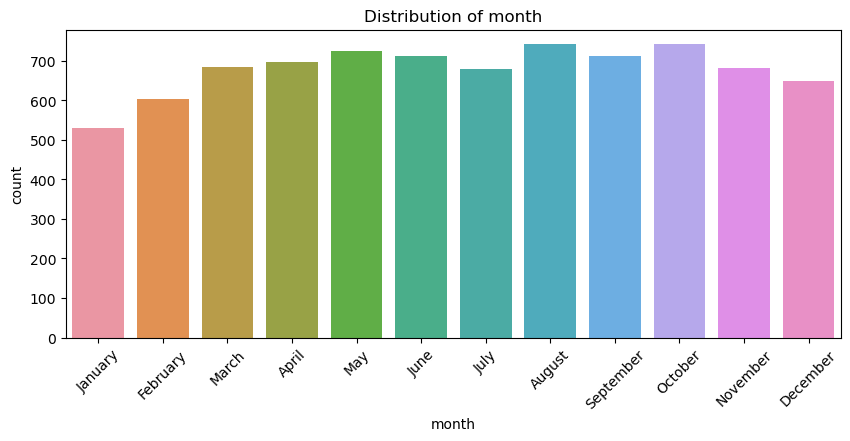

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


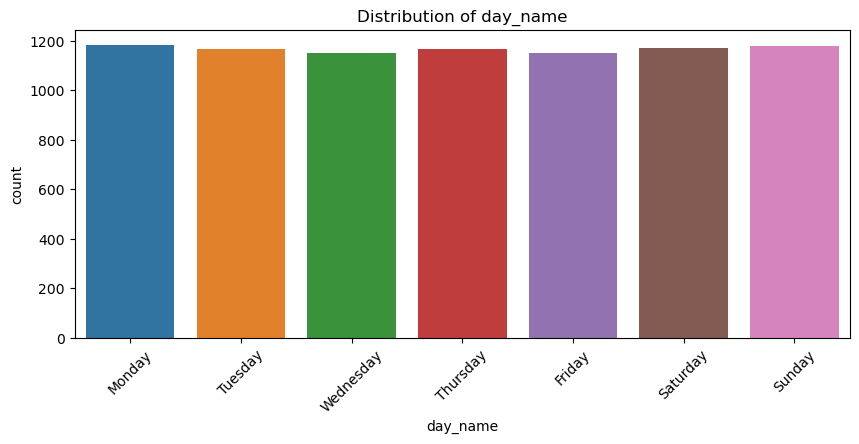

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


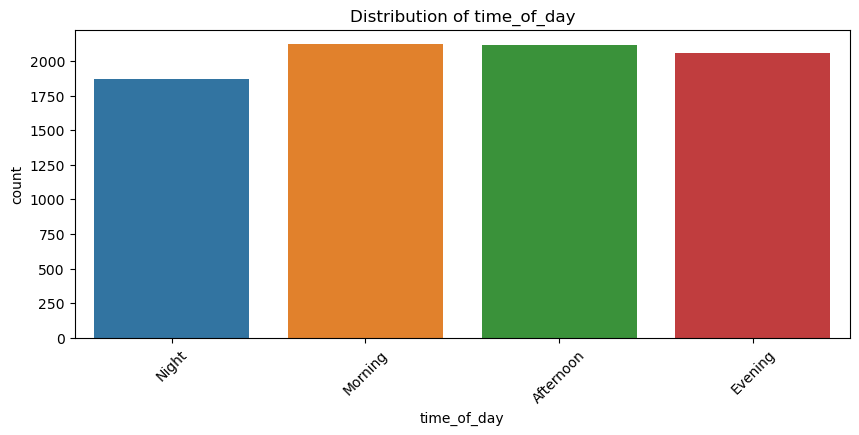

In [345]:
# Bar charts for each categorical variable
for column in cat_cols[1:]:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df_cleaned)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

## Energy Trend

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


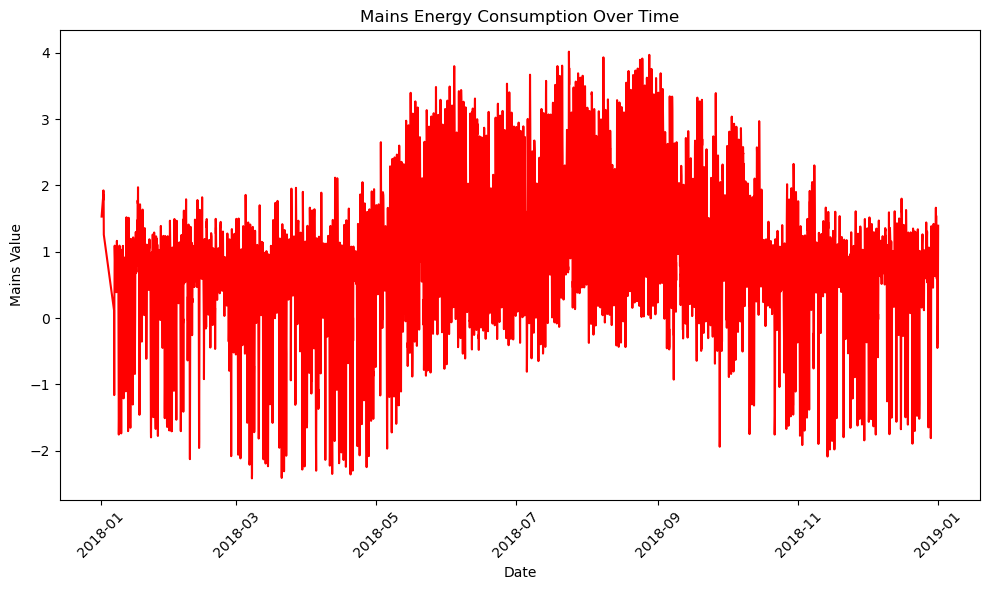

In [346]:
# Plot a line chart for the 'mains' column using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='grid', data=df_cleaned, color='red')

# Add titles and labels
plt.title('Mains Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Mains Value')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

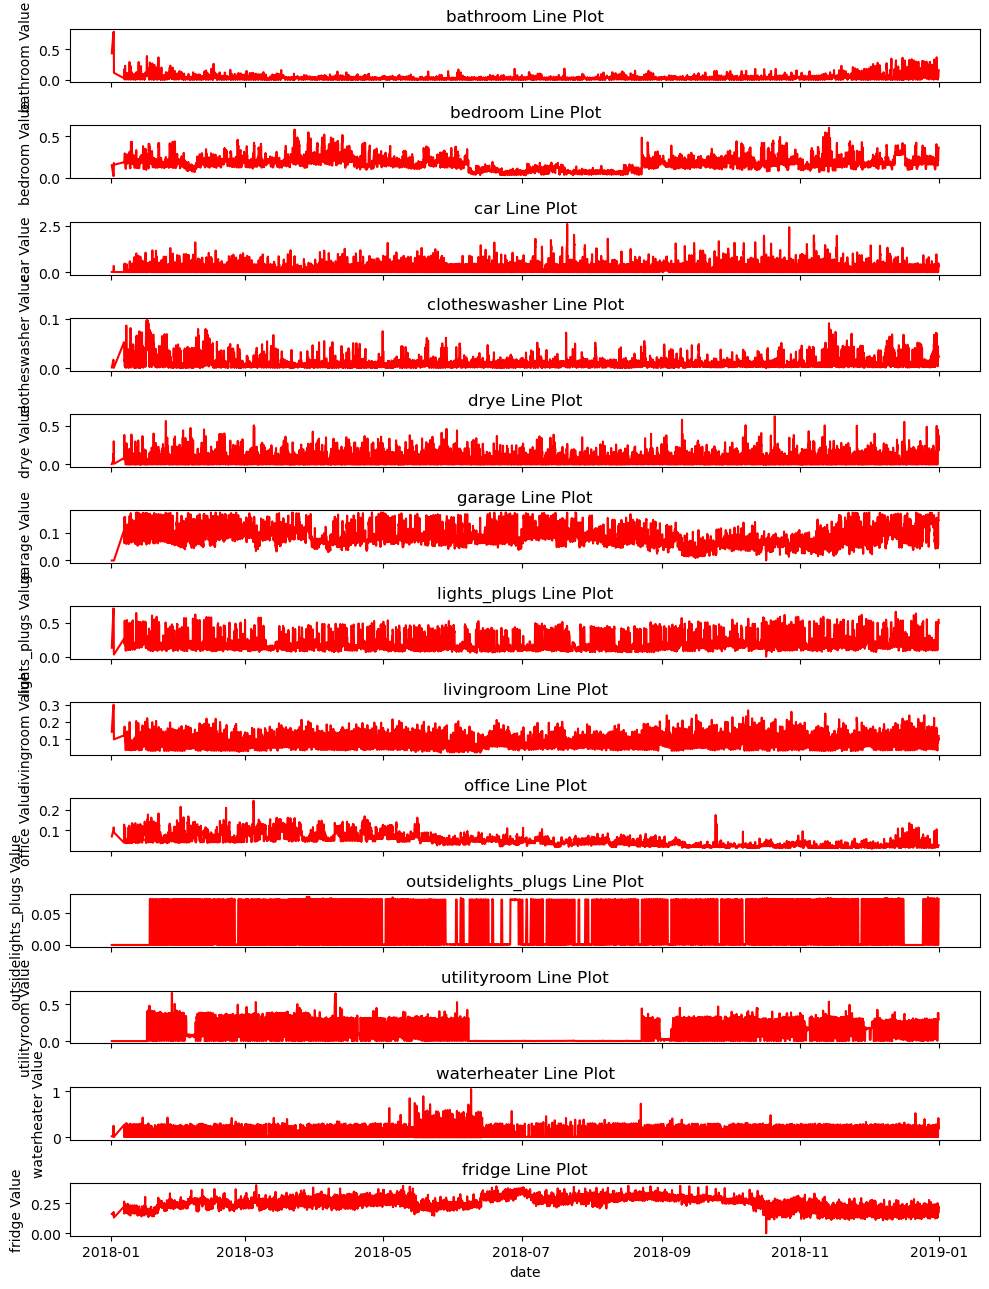

In [347]:
# Select only the numerical columns for plotting
appliance_cols = ['bathroom', 'bedroom', 'car', 'clotheswasher',
       'drye', 'garage', 'lights_plugs', 'livingroom', 'office',
       'outsidelights_plugs', 'utilityroom', 'waterheater', 'fridge']


# Create subplots with each variable in a different row
fig, axs = plt.subplots(len(appliance_cols), 1, figsize=(10, 1 * len(appliance_cols)), sharex=True)

# Loop through each numerical column and create a line plot in a different subplot
for i, col in enumerate(appliance_cols):
    axs[i].plot(df_cleaned.date, df_cleaned[col], label=col, color='red')  # Customize the color as desired
    axs[i].set_title(f'{col} Line Plot')
    axs[i].set_ylabel(f'{col} Value')
    #axs[i].legend(loc='upper right')

# Set a common x-axis label
plt.xlabel('date')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Trends - Heatmap

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_80259/4060974772.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = df_cleaned.groupby('month')[appliance_cols].mean()


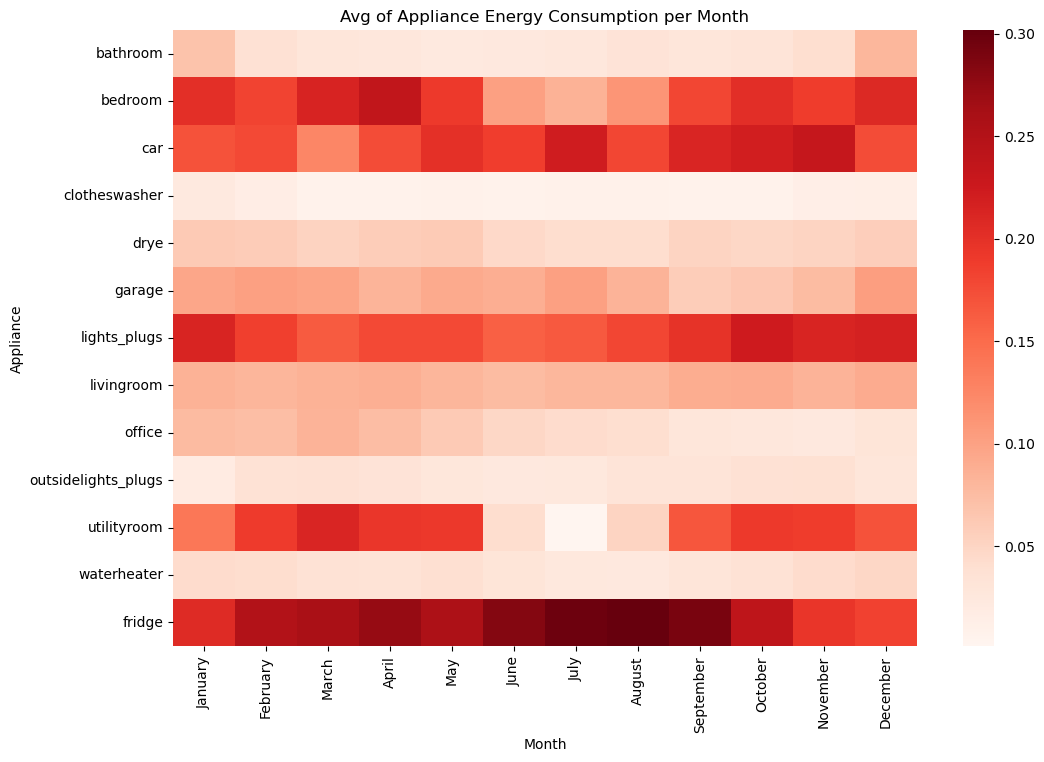

In [348]:
# Group by month and sum values for each appliance
df_heatmap = df_cleaned.groupby('month')[appliance_cols].mean()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Avg of Appliance Energy Consumption per Month')
plt.xlabel('Month')
plt.ylabel('Appliance')

# Show the plot
plt.show()

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_80259/2283709065.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = df_cleaned.groupby('time_of_day')[appliance_cols].mean()


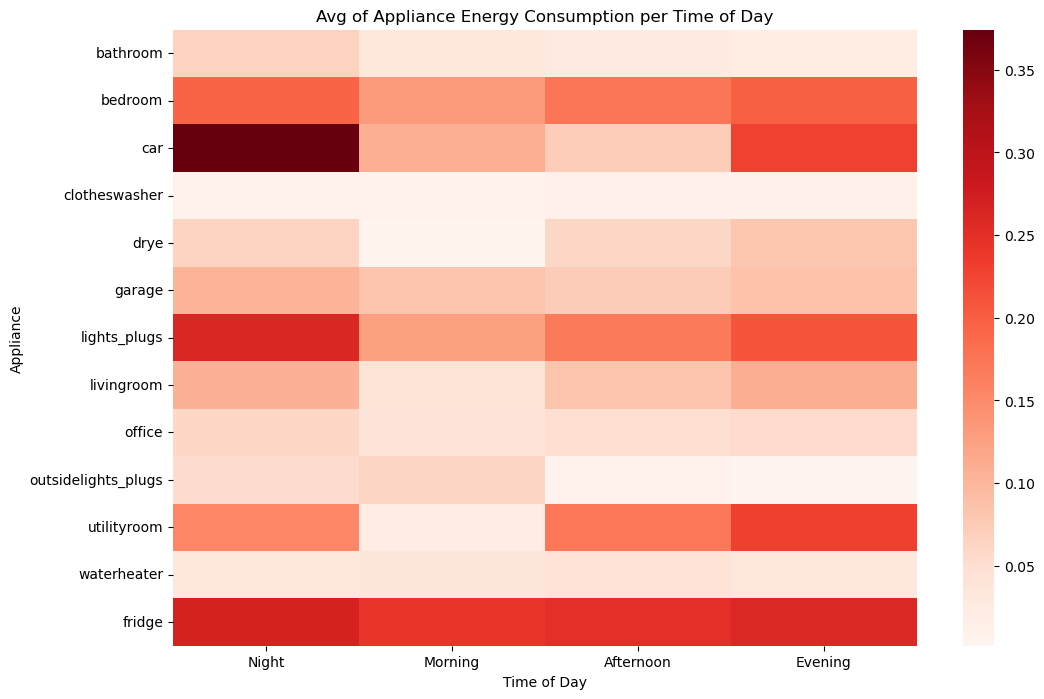

In [349]:
# Group by month and sum values for each appliance
df_heatmap = df_cleaned.groupby('time_of_day')[appliance_cols].mean()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Avg of Appliance Energy Consumption per Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Appliance')

# Show the plot
plt.show()

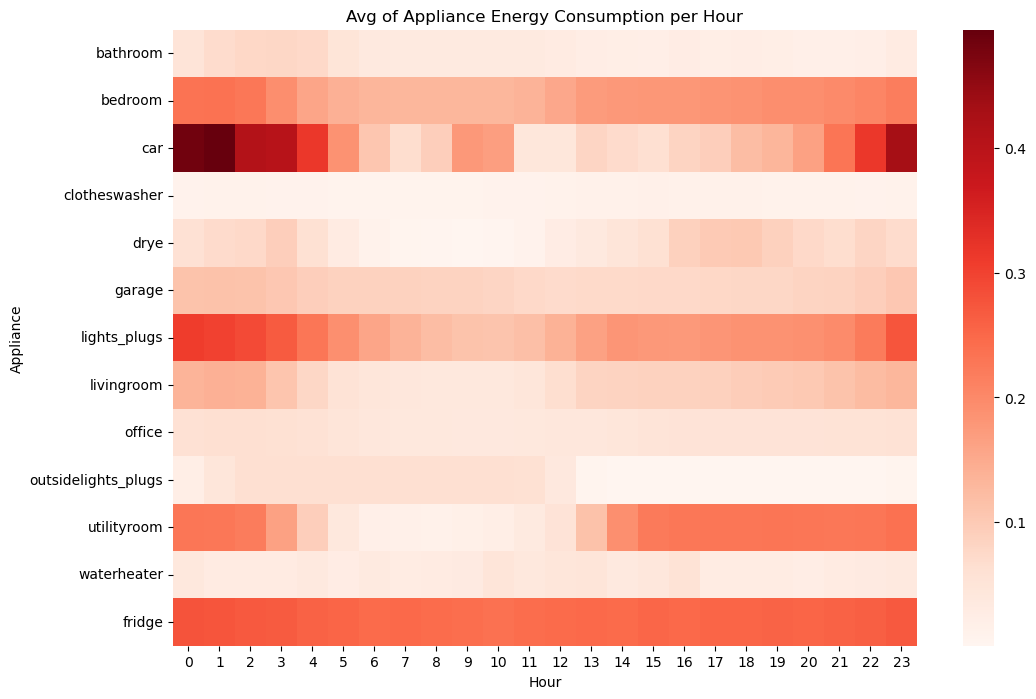

In [350]:
# Group by month and sum values for each appliance
df_heatmap = df_cleaned.groupby('hour')[appliance_cols].mean()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Avg of Appliance Energy Consumption per Hour')
plt.xlabel('Hour')
plt.ylabel('Appliance')

# Show the plot
plt.show()

# Outlier Detection - Isolation Forest

In [34]:
# Function to detect outliers for multiple columns
def detect_outliers(df, columns, contamination=0.05, random_state=42):
    for column in columns:
        # Drop missing values and filter out rows where the appliance usage is 0
        df_col = df[[column]].dropna()
        df_col = df_col[df_col[column] > 0]  # Optional: exclude zero values if necessary
        
        # Initialize Isolation Forest for the column
        iso_forest = IsolationForest(contamination=contamination, random_state=random_state)
        iso_forest.fit(df_col)
        
        # Predict anomalies (outliers = -1, normal = 1)
        df_col['anomaly'] = iso_forest.predict(df_col)
        
        # Add the outlier column back to the original dataframe
        df[f'{column}_outlier'] = np.nan
        df.loc[df_col.index, f'{column}_outlier'] = (df_col['anomaly'] == -1).astype(int)
    
    return df

# Function to visualize the outliers for multiple columns
def visualize_outliers_multi(df, columns, x_axis='hour'):
    num_cols = len(columns)
    
    # Create subplots, one row per column, sharing the x-axis
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12, 2 * num_cols), sharex=True)

    for i, column in enumerate(columns):
        # Check if outlier column exists
        if f'{column}_outlier' not in df.columns:
            print(f"Outlier column '{column}_outlier' not found. Please run outlier detection first.")
            continue
        
        # Select the current axis (row)
        ax = axes[i]

        # Separate outliers and inliers
        outliers = df[df[f'{column}_outlier'] == 1]
        inliers = df[df[f'{column}_outlier'] == 0]

        # Plot inliers and outliers
        sns.scatterplot(x=df.loc[inliers.index, x_axis], y=inliers[column], ax=ax, label='Normal', color='blue', alpha=0.6)
        sns.scatterplot(x=df.loc[outliers.index, x_axis], y=outliers[column], ax=ax, label='Outliers', color='red', marker='x')

        # Set title and labels for the current plot
        ax.set_title(f'Outlier Detection for {column}')
        ax.set_ylabel(f'{column.capitalize()} Usage')

    # Set the x-axis label once, shared by all plots
    axes[-1].set_xlabel(f'{x_axis.capitalize()}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

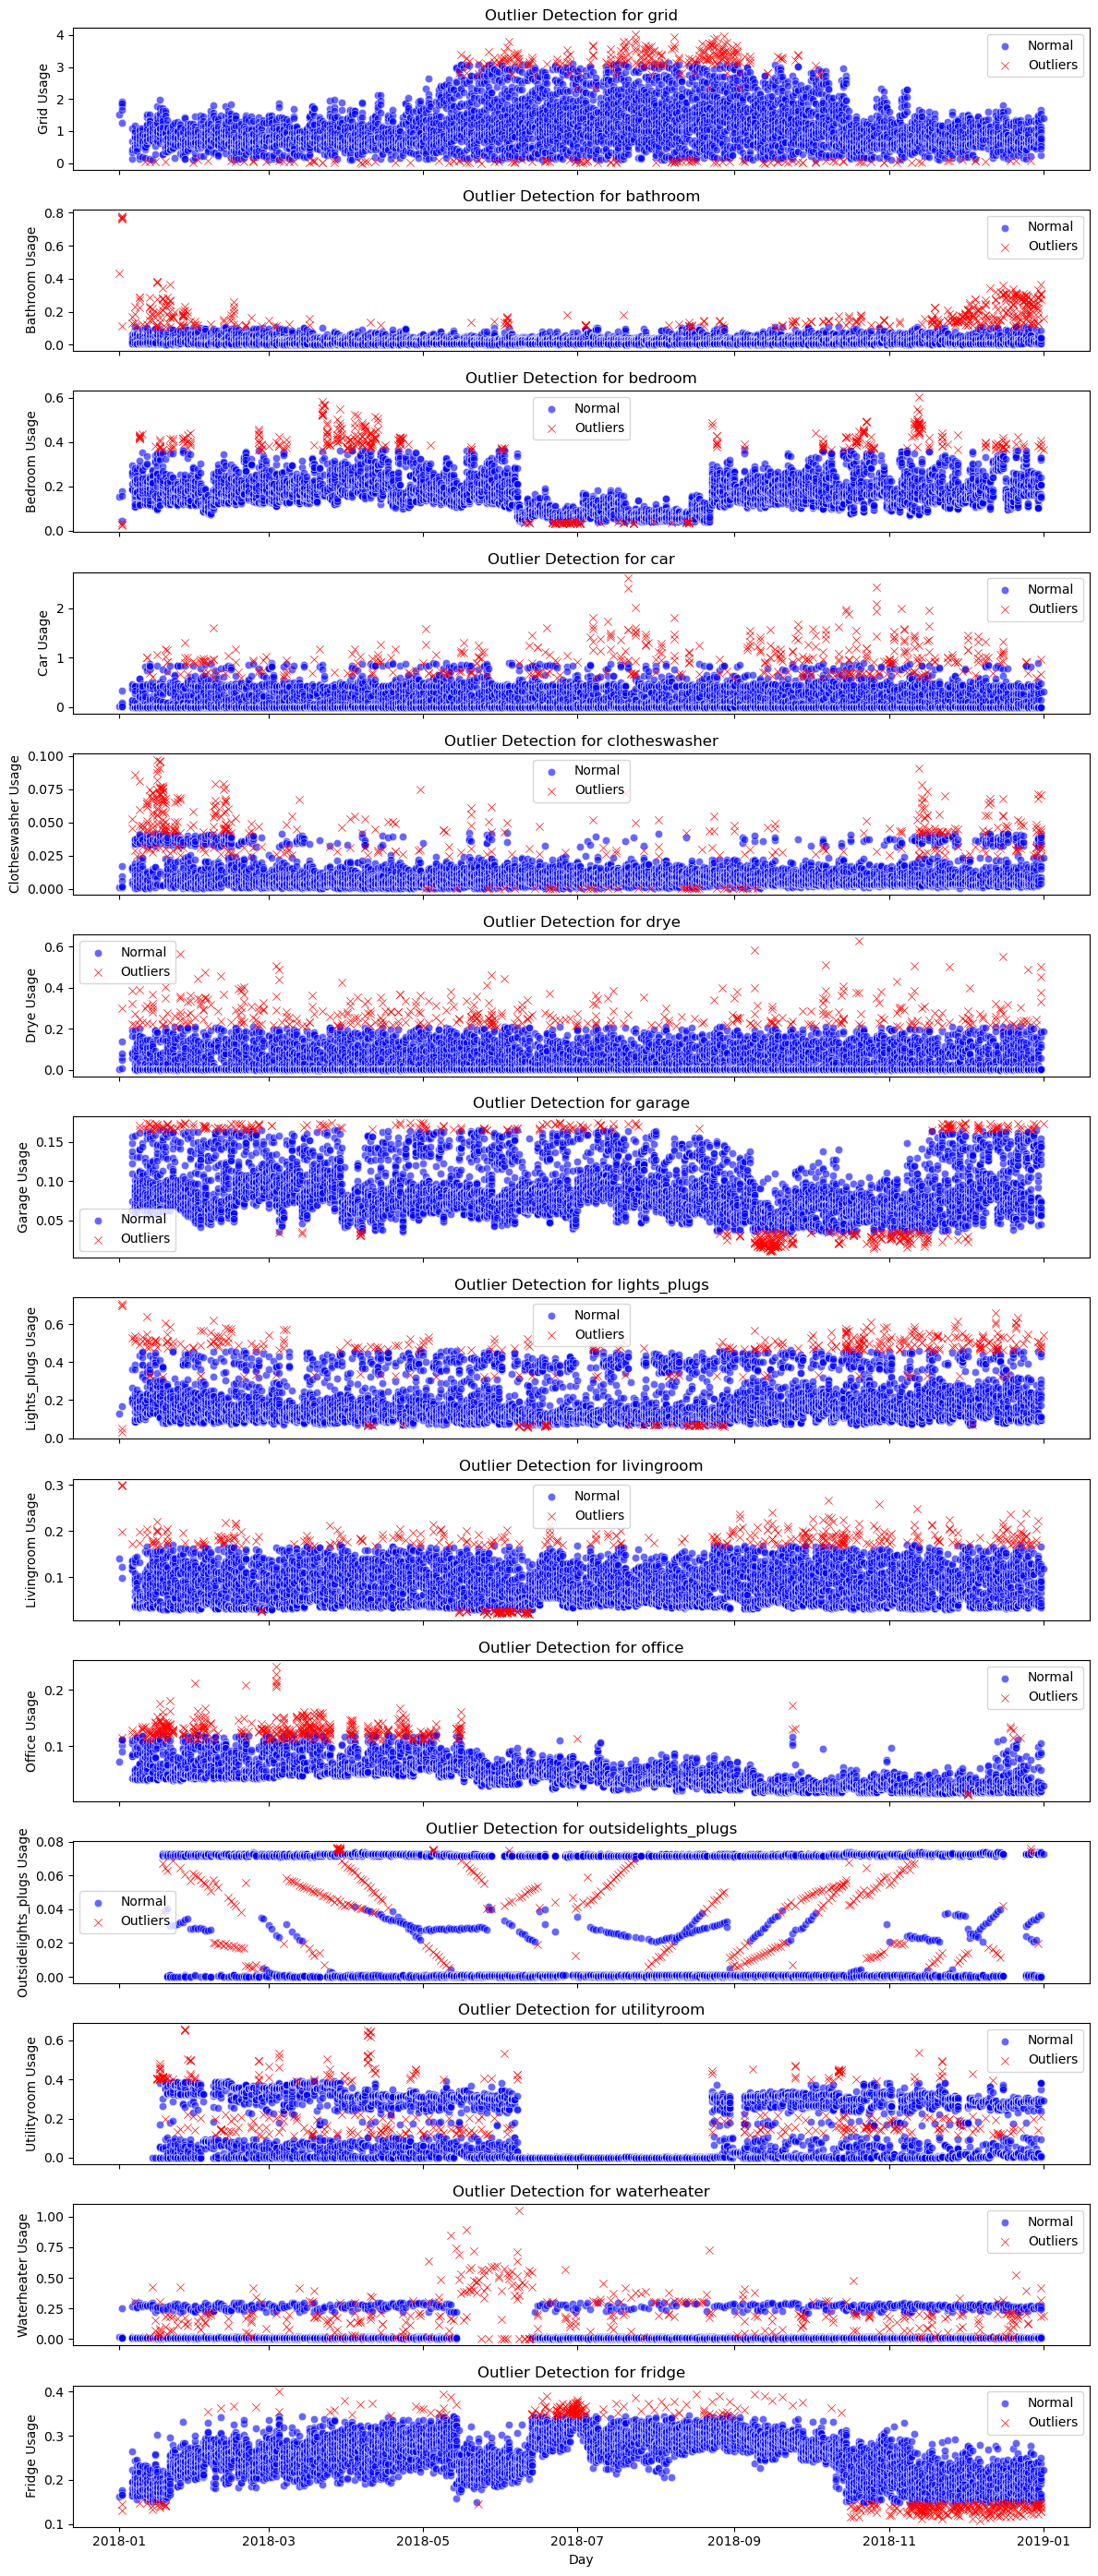

In [51]:
eval_cols = ['grid']+appliance_cols # Columns for multiple appliances
df_cleaned = detect_outliers(df_cleaned, eval_cols)  # Detect outliers for multiple appliances
visualize_outliers_multi(df_cleaned, eval_cols, x_axis='day')  # Visualize them side by side

# Consumption Prediction

## Individual Models

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Global settings
max_iter = 20  # Maximum number of iterations for RandomizedSearchCV
cv_folds = 5  # Number of cross-validation folds

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define MAPE scorer for RandomizedSearchCV
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Function to plot actual vs predicted values for both train and test sets
def plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Train: Actual vs Predicted ({model_name})")
    plt.legend()

    # Plot for test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5, color="green", label="Predicted vs Actual")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Test: Actual vs Predicted ({model_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to prepare the data with preprocessing (OneHotEncoding, Scaling)
def prepare_data(df, target_column, feature_columns=None):
    # Prepare the features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column].values

    # Define categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Create a preprocessor pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),   # Scale numerical features
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)   # One-hot encode categorical features, ignoring unknown categories
        ]
    )

    # Apply transformations to the features
    X_preprocessed = preprocessor.fit_transform(X)

    # Split the data randomly into train (80%) and test (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test

# Function to evaluate models using RandomizedSearchCV for hyperparameter optimization
def evaluate_models(X_train, y_train, X_test, y_test):
    # Initialize base regression models and hyperparameter search space
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': None  # No hyperparameter tuning for LinearRegression
        },
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'max_depth': [5, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 5]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'max_depth': [3, 5, 7, 10],
                'learning_rate': [0.01, 0.1, 0.3],
                'min_child_weight': [1, 5, 10],
                'subsample': [0.5, 0.7, 1.0],
                'colsample_bytree': [0.5, 0.7, 1.0]
            }
        }
    }
    

    # List to store the results for each model
    results = []

    # Loop through models and perform training and evaluation
    for model_name, model_info in models.items():
        model = model_info['model']
        params = model_info['params']

        if params is not None:
            # If hyperparameters are provided, use RandomizedSearchCV
            optimizer = RandomizedSearchCV(model, params, n_iter=max_iter, cv=cv_folds, random_state=42, scoring='r2', n_jobs=-1)
            optimizer.fit(X_train, y_train)
            best_model = optimizer.best_estimator_
        else:
            # No hyperparameter tuning (e.g., LinearRegression)
            best_model = model
            best_model.fit(X_train, y_train)

        # Predict on train and test sets
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Plot actual vs predicted for both train and test sets
        plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name)

        # Calculate evaluation metrics for train set
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)

        # Calculate evaluation metrics for test set
        mae_test = mean_absolute_error(y_test, y_test_pred)
        mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Store the results in a dictionary for both train and test sets
        results.append({
            'Model': model_name,
            'Train_MAE': mae_train,
            'Train_MAPE (%)': mape_train,
            'Train_R2': r2_train,
            'Test_MAE': mae_test,
            'Test_MAPE (%)': mape_test,
            'Test_R2': r2_test
        })

    # Convert the results list into a DataFrame
    ML_result_df = pd.DataFrame(results)

    return ML_result_df


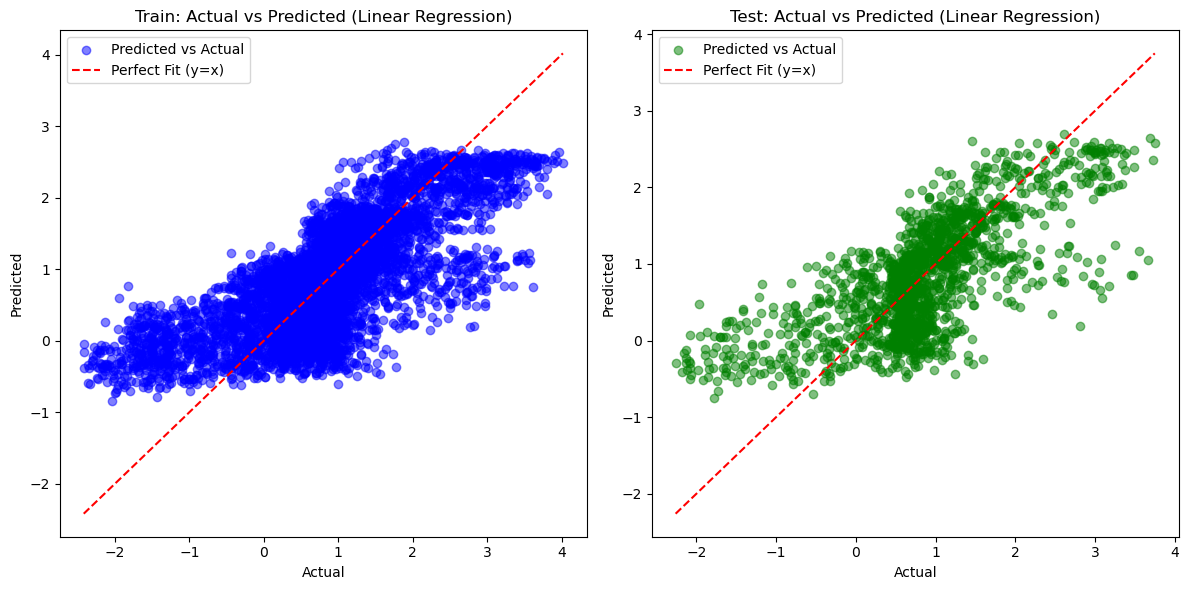

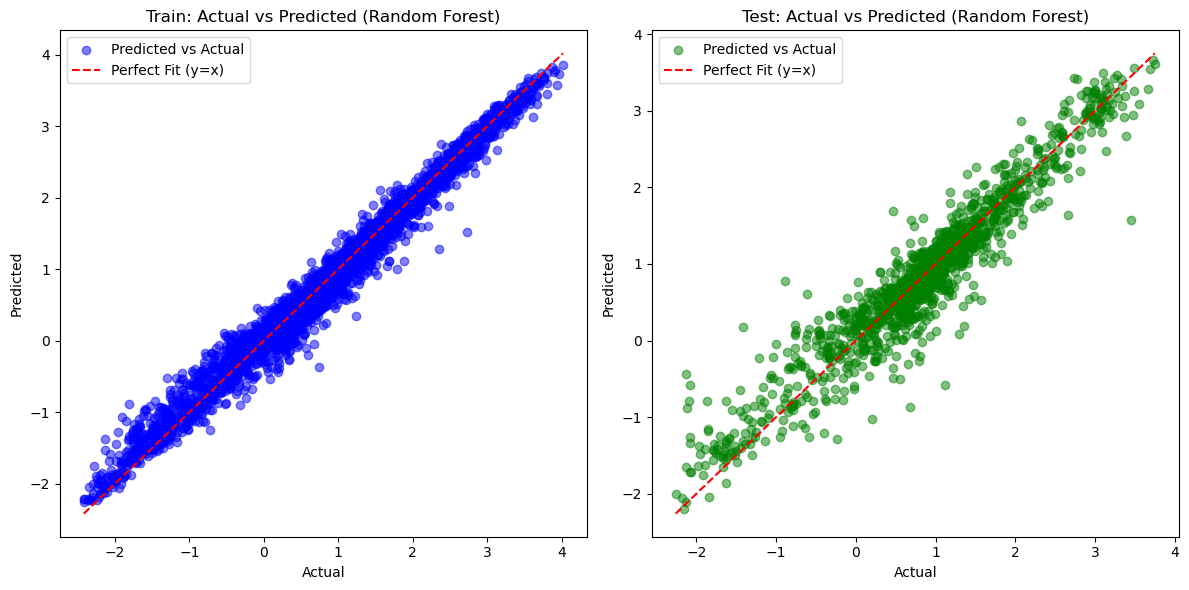

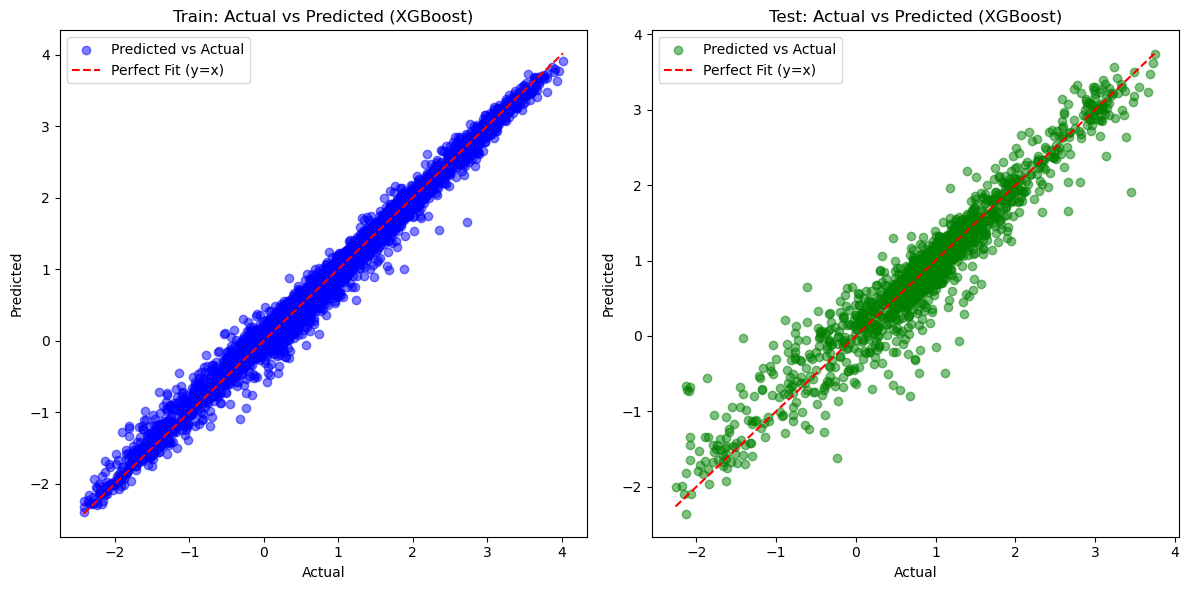

Model  Train_MAE  Train_MAPE (%)  Train_R2  Test_MAE  \
0  Linear Regression   0.526553      138.169196  0.538891  0.525722   
1      Random Forest   0.097252       29.147008  0.979731  0.207331   
2            XGBoost   0.086837       24.607472  0.985292  0.194811   

   Test_MAPE (%)   Test_R2  
0     240.841945  0.519132  
1      93.547410  0.907076  
2      98.965562  0.916148

In [353]:
feature_columns = ['month', 'day_name', 'hour', 'time_of_day','temp','dwpt', 'rhum', 'wdir', 'wspd', 'pres']
target = 'grid'

# Prepare the data
X_train, y_train, X_test, y_test = prepare_data(df_cleaned, target_column=target, feature_columns=feature_columns)

# Evaluate models and display the results
results = evaluate_models(X_train, y_train, X_test, y_test)
display(results)


## Stacking - tuning

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Global settings
max_iter = 40  # Maximum number of iterations for RandomizedSearchCV
cv_folds = 5  # Number of cross-validation folds

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define MAPE scorer for RandomizedSearchCV
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Function to plot actual vs predicted values for both train and test sets
def plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Train: Actual vs Predicted ({model_name})")
    plt.legend()

    # Plot for test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5, color="green", label="Predicted vs Actual")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Test: Actual vs Predicted ({model_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to prepare the data with preprocessing (OneHotEncoding, Scaling)
def prepare_data(df, target_column, feature_columns=None):
    # Prepare the features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column].values

    # Define categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Create a preprocessor pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),   # Scale numerical features
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)   # One-hot encode categorical features, ignoring unknown categories
        ]
    )

    # Apply transformations to the features
    X_preprocessed = preprocessor.fit_transform(X)

    # Split the data randomly into train (80%) and test (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test

# Function to evaluate the stacking model
def evaluate_stacking_model(X_train, y_train, X_test, y_test):
    # Define hyperparameter search space for RandomForest
    rf_params = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }

    # Define hyperparameter search space for XGBoost
    xgb_params = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0]
    }

    # Base models
    rf = RandomForestRegressor(random_state=42)
    xgb = XGBRegressor(random_state=42)

    # Tune RandomForest using RandomizedSearchCV
    rf_search = RandomizedSearchCV(rf, rf_params, n_iter=max_iter, cv=cv_folds, random_state=42, scoring='r2', n_jobs=-1)
    rf_search.fit(X_train, y_train)
    best_rf = rf_search.best_estimator_

    # Tune XGBoost using RandomizedSearchCV
    xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=max_iter, cv=cv_folds, random_state=42, scoring='r2', n_jobs=-1)
    xgb_search.fit(X_train, y_train)
    best_xgb = xgb_search.best_estimator_

    # Create a stacking regressor using Linear Regression as final estimator and tuned RandomForest, XGBoost as base models
    stacking_model = StackingRegressor(
        estimators=[
            ('rf', best_rf),
            ('xgb', best_xgb)
        ],
        final_estimator=LinearRegression(),  # You can change this to any other model
        cv=cv_folds
    )

    # Train the stacking model
    stacking_model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = stacking_model.predict(X_train)
    y_test_pred = stacking_model.predict(X_test)

    # Plot actual vs predicted for both train and test sets
    plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, "Stacking Model with RF & XGBoost")

    # Calculate evaluation metrics for train set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate evaluation metrics for test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Create a dictionary to store results
    results = {
        'Train_MAE': mae_train,
        'Train_MAPE (%)': mape_train,
        'Train_R2': r2_train,
        'Test_MAE': mae_test,
        'Test_MAPE (%)': mape_test,
        'Test_R2': r2_test
    }

    # Return results
    return pd.DataFrame([results])


In [318]:

feature_columns = ['month', 'day_name','hour','time_of_day','temp','dwpt', 'rhum', 'wdir', 'wspd', 'pres']
target = 'grid'

# Prepare the data
X_train, y_train, X_test, y_test = prepare_data(df_cleaned, target, feature_columns)

# Evaluate the stacking model
results = evaluate_stacking_model(X_train, y_train, X_test, y_test)
display(results)


KeyboardInterrupt: 

## ML Prediction - NN

In [288]:
df_cleaned.columns

Index(['dataid', 'grid', 'date', 'bathroom', 'bedroom', 'car', 'clotheswasher',
       'drye', 'garage', 'lights_plugs', 'livingroom', 'office',
       'outsidelights_plugs', 'utilityroom', 'waterheater', 'fridge', 'leg',
       'day', 'month', 'day_name', 'hour', 'minute', 'time_of_day', 'temp',
       'dwpt', 'rhum', 'wdir', 'wspd', 'pres', 'others'],
      dtype='object')

Epoch 1/100
204/204 [==============================] - 1s 2ms/step - loss: 0.4273 - mae: 0.4520 - val_loss: 0.2775 - val_mae: 0.3619
Epoch 2/100
204/204 [==============================] - 0s 1ms/step - loss: 0.2132 - mae: 0.3184 - val_loss: 0.1777 - val_mae: 0.2904
Epoch 3/100
204/204 [==============================] - 0s 1ms/step - loss: 0.1468 - mae: 0.2693 - val_loss: 0.1350 - val_mae: 0.2555
Epoch 4/100
204/204 [==============================] - 0s 1ms/step - loss: 0.1187 - mae: 0.2449 - val_loss: 0.1262 - val_mae: 0.2458
Epoch 5/100
204/204 [==============================] - 0s 1ms/step - loss: 0.1084 - mae: 0.2334 - val_loss: 0.1141 - val_mae: 0.2339
Epoch 6/100
204/204 [==============================] - 0s 1ms/step - loss: 0.0994 - mae: 0.2254 - val_loss: 0.1104 - val_mae: 0.2304
Epoch 7/100
204/204 [==============================] - 0s 1ms/step - loss: 0.0896 - mae: 0.2150 - val_loss: 0.1097 - val_mae: 0.2303
Epoch 8/100
204/204 [==============================] - 0s 1ms/step - 

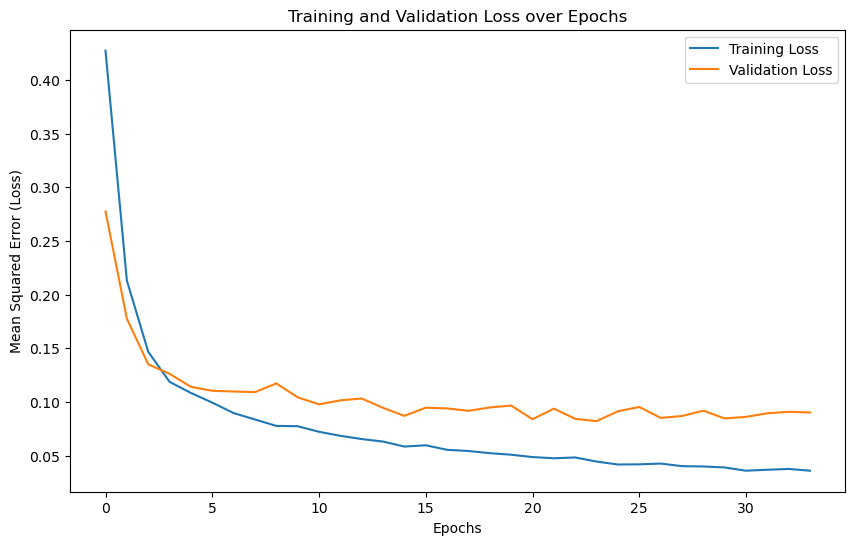

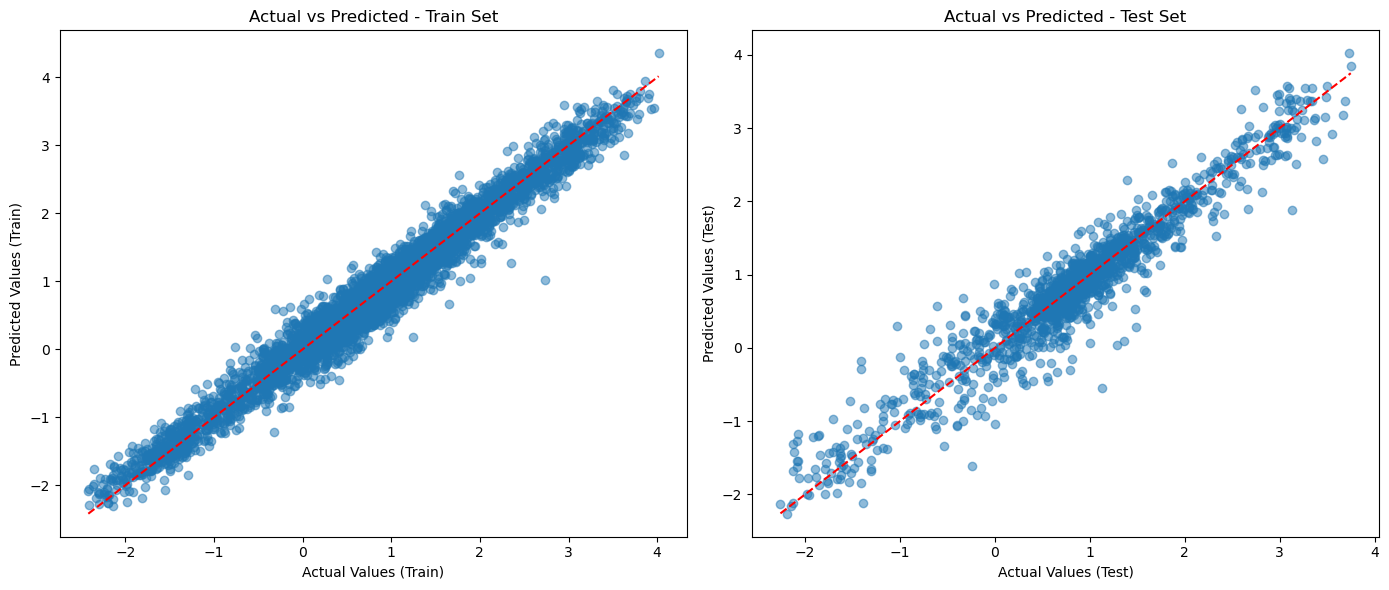

Train_MAE  Train_MAPE (%)  Train_R2  Test_MAE  Test_MAPE (%)   Test_R2
0   0.143478       46.324879  0.965087  0.201865     154.696034  0.917666

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


# Features and target
feature_columns = ['month', 'day_name', 'hour', 'time_of_day','temp','dwpt', 'rhum', 'wdir', 'wspd', 'pres']
target = 'grid'

# Splitting the data into features (X) and target (y)
X = df_cleaned[feature_columns]
y = df_cleaned[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for feature columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ]
)

# Creating a preprocessing and modeling pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Building the Neural Network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_processed.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

from tensorflow.keras.callbacks import ReduceLROnPlateau
# Adding early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training the model
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=32, validation_data=(X_test_processed, y_test), callbacks=[early_stop])

# Evaluating the model
y_train_pred = model.predict(X_train_processed)
y_test_pred = model.predict(X_test_processed)

# Calculating metrics with sklearn
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Creating a result table
results = pd.DataFrame({
    'Train_MAE': [train_mae],
    'Train_MAPE (%)': [train_mape],
    'Train_R2': [train_r2],
    'Test_MAE': [test_mae],
    'Test_MAPE (%)': [test_mape],
    'Test_R2': [test_r2]
})




# Plotting the loss function over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Training and Validation Loss over Epochs')
plt.legend()


# Plotting Actual vs Predicted for Train and Test sets
plt.figure(figsize=(14, 6))

# Train set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Values (Train)')
plt.ylabel('Predicted Values (Train)')
plt.title('Actual vs Predicted - Train Set')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values (Test)')
plt.ylabel('Predicted Values (Test)')
plt.title('Actual vs Predicted - Test Set')

plt.tight_layout()
plt.show()

plt.show()

display(results)

## ML Prediction - WANDB

In [1]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: hassan-almarhoon (hassan-almarhoon-IE University). Use `wandb login --relogin` to force relogin


True

In [35]:
import pandas as pd
import wandb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb


# Define the model training function
def train_model(config=None):
    with wandb.init(config=config):
        config = wandb.config
        
        # Choose between RandomForest and XGBoost
        if config.model_type == "RandomForest":
            # Define RandomForest model
            model = RandomForestRegressor(
                n_estimators=config.n_estimators,
                max_depth=config.max_depth,
                min_samples_split=config.min_samples_split,
                min_samples_leaf=config.min_samples_leaf,
                random_state=42
            )
        elif config.model_type == "XGBoost":
            # Define XGBoost model
            model = xgb.XGBRegressor(
                n_estimators=config.n_estimators,
                max_depth=config.max_depth,
                learning_rate=config.learning_rate,
                min_child_weight=config.min_child_weight,
                objective='reg:squarederror',
                random_state=42
            )
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metric
        mse = mean_squared_error(y_test, y_pred)
        
        # Log metrics to wandb
        wandb.log({'mean_squared_error': mse})

In [37]:

# Split data into features and target
target_column = 'grid'
feature_columns = ['month', 'day_name', 'hour', 'time_of_day', 'is_weekend']
X = df_cleaned[feature_columns]
y = df_cleaned[target_column]

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['day_name', 'time_of_day', 'is_weekend'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Initialize wandb
wandb.init(project='energy-usage-optimization', name='hyperparameter-optimization')



# Define the sweep configuration
sweep_config = {
    'method': 'bayes',  # You can also use 'random' or 'grid' search
    'metric': {
        'name': 'mean_squared_error',
        'goal': 'minimize'   
    },
    'parameters': {
        'model_type': {
            'values': ['RandomForest', 'XGBoost']
        },
        'n_estimators': {
            'values': [50, 100, 150, 200]
        },
        'max_depth': {
            'values': [None, 10, 20, 30]
        },
        # RandomForest Specific Parameters
        'min_samples_split': {
            'values': [2, 5, 10]
        },
        'min_samples_leaf': {
            'values': [1, 2, 4]
        },
        # XGBoost Specific Parameters
        'learning_rate': {
            'values': [0.01, 0.05, 0.1]
        },
        'min_child_weight': {
            'values': [1, 3, 5]
        }
    }
}

# Create a sweep
sweep_id = wandb.sweep(sweep_config, project='energy-usage-optimization')

# Run the sweep
wandb.agent(sweep_id, function=train_model, count=20)


Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x31c4bd0d0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 31ab72690, raw_cell="
# Split data into features and target
target_colu.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/hassan/Desktop/IE/Term%203/Capstone/Dataset/DataPort_Pecanstreet/Data_Loader.ipynb#Y233sZmlsZQ%3D%3D>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: immghqcq
Sweep URL: https://wandb.ai/hassan-almarhoon-IE%20University/energy-usage-optimization/sweeps/immghqcq


wandb: Agent Starting Run: 4s4tlv5y with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: None
wandb: 	min_child_weight: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	model_type: RandomForest
wandb: 	n_estimators: 150


wandb: 🚀 View run hyperparameter-optimization at: https://wandb.ai/hassan-almarhoon-IE University/energy-usage-optimization/runs/jhjn4sz8
wandb: Find logs at: wandb/run-20241103_151402-jhjn4sz8/logs


Traceback (most recent call last):
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/categorical.py", line 591, in astype
    new_cats = new_cats.astype(dtype=dtype, copy=copy)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'January'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_79089/2947824740.py", line 37, in train_model
    model.fit(X_train, y_train)
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassan/anaconda3/lib/python3.11/site-packag

wandb: ERROR Run 4s4tlv5y errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/categorical.py", line 591, in astype
wandb: ERROR     new_cats = new_cats.astype(dtype=dtype, copy=copy)
wandb: ERROR                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR ValueError: could not convert string to float: 'January'
wandb: ERROR 
wandb: ERROR During handling of the above exception, another exception occurred:
wandb: ERROR 
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/wandb/agents/pyagent.py", line 306, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_79089/2947824740.py", line 37, in train_model
wandb: ERROR     model.fit(X_train, y_train)
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 

Traceback (most recent call last):
  File "/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_79089/2947824740.py", line 37, in train_model
    model.fit(X_train, y_train)
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1055, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 521, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 958, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 730, in inner_f


wandb: ERROR Run i0jckbdj errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/wandb/agents/pyagent.py", line 306, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_79089/2947824740.py", line 37, in train_model
wandb: ERROR     model.fit(X_train, y_train)
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 730, in inner_f
wandb: ERROR     return func(**kwargs)
wandb: ERROR            ^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1055, in fit
wandb: ERROR     train_dmatrix, evals = _wrap_evaluation_matrices(
wandb: ERROR                            ^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 521, in _wrap_evaluation_matrices
wandb: ERROR     t

Traceback (most recent call last):
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/categorical.py", line 591, in astype
    new_cats = new_cats.astype(dtype=dtype, copy=copy)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'January'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_79089/2947824740.py", line 37, in train_model
    model.fit(X_train, y_train)
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/hassan/anaconda3/lib/python3.11/site-packag

wandb: ERROR Run 9pk7e7hr errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/categorical.py", line 591, in astype
wandb: ERROR     new_cats = new_cats.astype(dtype=dtype, copy=copy)
wandb: ERROR                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR ValueError: could not convert string to float: 'January'
wandb: ERROR 
wandb: ERROR During handling of the above exception, another exception occurred:
wandb: ERROR 
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/wandb/agents/pyagent.py", line 306, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_79089/2947824740.py", line 37, in train_model
wandb: ERROR     model.fit(X_train, y_train)
wandb: ERROR   File "/Users/hassan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x31c4bd0d0>> (for post_run_cell), with arguments args (<ExecutionResult object at 31c2efb50, execution_count=37 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 31ab72690, raw_cell="
# Split data into features and target
target_colu.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/hassan/Desktop/IE/Term%203/Capstone/Dataset/DataPort_Pecanstreet/Data_Loader.ipynb#Y233sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe